In [ ]:
# import pandas as pd
# import glob
# import os
# import openpyxl
# import re
# from urllib.parse import unquote

# # Function to extract hyperlinks from Excel files with support for HYPERLINK() formulas
# def extract_hyperlinks(excel_file, sheet_name=0):
#     """
#     Extract hyperlinks from Excel files, supporting both standard hyperlinks and HYPERLINK() formulas.
    
#     Parameters:
#     -----------
#     excel_file : str
#         Path to the Excel file
#     sheet_name : int or str, default=0
#         Sheet index (0-based) or name
        
#     Returns:
#     --------
#     dict
#         Dictionary mapping row indices (0-based) to URLs
#     """
#     try:
#         # Load the workbook with formulas preserved
#         wb = openpyxl.load_workbook(excel_file, data_only=False)
        
#         # Handle both sheet name and index
#         try:
#             if isinstance(sheet_name, int):
#                 ws = wb.worksheets[sheet_name]
#             else:
#                 ws = wb[sheet_name]
#         except (IndexError, KeyError) as e:
#             print(f"Error accessing sheet {sheet_name} in {excel_file}: {e}")
#             # Try to use the active sheet as fallback
#             ws = wb.active
#             print(f"Using active sheet instead: {ws.title}")
        
#         # Find the column index for "View Company Online"
#         header_row = next(ws.rows, None)
#         if header_row is None:
#             print(f"Empty worksheet in {excel_file}")
#             return {}
            
#         view_company_col_idx = None
        
#         for idx, cell in enumerate(header_row, 1):  # Excel columns are 1-indexed
#             if cell.value == "View Company Online":
#                 view_company_col_idx = idx
#                 break
        
#         if view_company_col_idx is None:
#             print(f"'View Company Online' column not found in {excel_file}")
#             return {}
        
#         # Create a dictionary to store hyperlinks
#         hyperlinks = {}
        
#         # Regular expression to extract URL from HYPERLINK formula
#         # Format: =HYPERLINK("URL","Text")
#         hyperlink_regex = r'=HYPERLINK\("([^"]+)",.+\)'
        
#         # Start from row 2 (assuming header is row 1)
#         for row_idx in range(2, ws.max_row + 1):
#             try:
#                 cell = ws.cell(row=row_idx, column=view_company_col_idx)
#                 url = None
                
#                 # Method 1: Check if cell contains a HYPERLINK formula
#                 if cell.value and isinstance(cell.value, str) and cell.value.startswith("=HYPERLINK"):
#                     # Extract URL from HYPERLINK formula using regex
#                     match = re.search(hyperlink_regex, cell.value)
#                     if match:
#                         url = match.group(1)  # The captured URL
                
#                 # Method 2: Direct hyperlink attribute (fallback)
#                 if url is None and hasattr(cell, 'hyperlink') and cell.hyperlink is not None:
#                     if hasattr(cell.hyperlink, 'target') and cell.hyperlink.target:
#                         url = cell.hyperlink.target
                
#                 # Method 3: Internal _hyperlink attribute (fallback)
#                 if url is None and hasattr(cell, '_hyperlink') and cell._hyperlink is not None:
#                     if hasattr(cell._hyperlink, 'target') and cell._hyperlink.target:
#                         url = cell._hyperlink.target
                
#                 # Method 4: Check for hyperlink in cell.value as plain text (fallback)
#                 if url is None and isinstance(cell.value, str) and (
#                     cell.value.startswith("http://") or cell.value.startswith("https://")
#                 ):
#                     url = cell.value
                
#                 # If we found a URL, add it to our dictionary
#                 if url:
#                     hyperlinks[row_idx-2] = url  # Adjust for 0-based indexing in pandas
            
#             except Exception as cell_error:
#                 print(f"Error processing cell at row {row_idx}, column {view_company_col_idx} in {excel_file}: {cell_error}")
#                 continue
        
#         return hyperlinks
    
#     except Exception as e:
#         print(f"Error extracting hyperlinks from {excel_file}: {e}")
#         return {}

# # Example usage:
# def process_excel_files(directory="."):
#     """
#     Process all Excel files in a directory, extract hyperlinks, and combine into a CSV.
    
#     Parameters:
#     -----------
#     directory : str, default="."
#         Directory containing Excel files
#     """
#     # Get all .xlsx files in the directory
#     excel_files = glob.glob(os.path.join(directory, "*.xlsx"))
    
#     if not excel_files:
#         print("No Excel files found in the specified directory.")
#         return None
    
#     # Create an empty list to store dataframes
#     dfs = []
    
#     # Process each Excel file
#     for file in excel_files:
#         print(f"Processing file: {file}")
        
#         try:
#             # Read the Excel file
#             df = pd.read_excel(file)
            
#             # Extract hyperlinks
#             hyperlinks = extract_hyperlinks(file)
            
#             # If hyperlinks were found, add them to a new column
#             if hyperlinks:
#                 print(f"Found {len(hyperlinks)} hyperlinks in {file}")
#                 # Create a new column for the actual URLs
#                 df['Company URL'] = df.index.map(lambda idx: hyperlinks.get(idx, None))
#             else:
#                 print(f"No hyperlinks found in {file}")
            
#             dfs.append(df)
#         except Exception as e:
#             print(f"Error processing file {file}: {e}")
#             continue
    
#     # Combine all dataframes into one
#     if dfs:
#         combined_df = pd.concat(dfs, ignore_index=True)

#         # Save to a new CSV file with the URLs
#         output_csv = "combined_ipo_with_urls.csv"
#         combined_df.to_csv(output_csv, index=False)

#         print(f"Combined {len(dfs)} Excel files with hyperlinks into {output_csv}")
#         return combined_df
#     else:
#         print("No data was processed successfully. Please check the errors above.")
#         return None

# # Run the processing
# combined_data = process_excel_files("IPO_data")

# # Display a sample of the combined data with hyperlinks
# if combined_data is not None and 'Company URL' in combined_data.columns:
#     print("\nSample of combined data with URLs:")
#     print(combined_data[['Company URL']].head())

In [1]:
# Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('combined_ipo_with_urls.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of unique companies: {df['Companies'].nunique()}")

# Check target variables for valuation prediction
valuation_columns = ['Deal Size', 'Pre-money Valuation', 'Post Valuation']
for col in valuation_columns:
    print(f"{col}: {df[col].notna().sum()} non-null values")

# Display a sample of the data
df.head(2)

Dataset shape: (295, 175)
Number of unique companies: 110
Deal Size: 295 non-null values
Pre-money Valuation: 234 non-null values
Post Valuation: 295 non-null values


,Deal ID,Companies,Company ID,Registration Number,Description,Financing Status Note,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,USD Second-Lien New Money,EUR Total Institutional New Money,EUR First-Lien New Money,EUR First-Lien Institutional New Money,EUR Second-Lien New Money,Total First-Lien Institutional New Money,Total New Money,Total New Inst Amount,View Company Online,Company URL
0,114503-77T,Aterian (NAS: ATER),65091-16,NaN,Aterian Inc is a technology-enabled consumer p...,The company (NAS: ATER) received $19.9 million...,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Media and Inf...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Company Online,https://my.pitchbook.com?c=114503-77T
1,118828-09T,Aterian (NAS: ATER),65091-16,NaN,Aterian Inc is a technology-enabled consumer p...,The company (NAS: ATER) received $19.9 million...,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Media and Inf...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Company Online,https://my.pitchbook.com?c=118828-09T



Missing values in key columns:
TLB Amount                  295
HY Bond Amount              295
Mezzanine Amount            295
RC Amount                   295
TLA Amount                  295
1st Lien Amount             295
2nd Lien Amount             295
New Institutional Amount    295
First Lien Ytm Primary      295
First Lien OID              295
dtype: int64

Percentage of missing values in key columns:
Deal Type 3                            100.0
Contingent Payout                      100.0
Dividend/Distribution Beneficiaries    100.0
RC Amount                              100.0
Mezzanine Amount                       100.0
HY Bond Amount                         100.0
TLB Amount                             100.0
USD Total Institutional New Money      100.0
Cov-Lite Amount                        100.0
TLC Amount                             100.0
dtype: float64


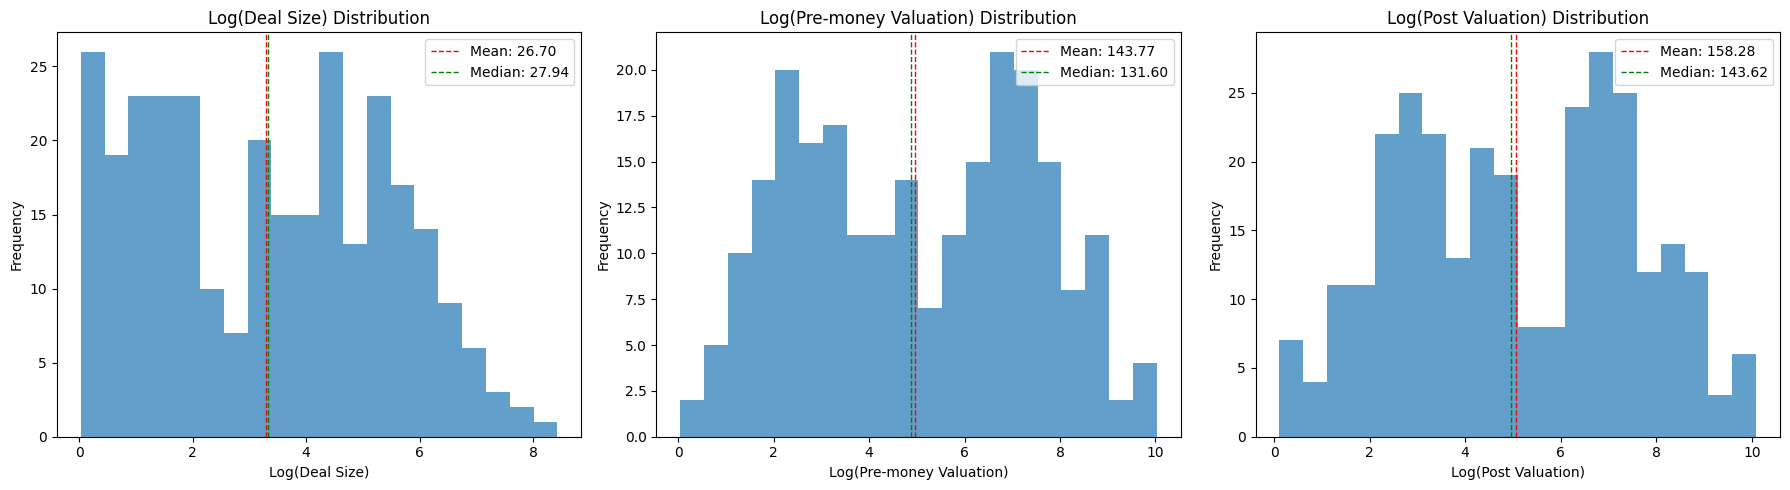


Date-related columns:
['Announced Date', 'Deal Date', 'Raised to Date', 'Launch Date']

Unique values in Current Financing Status:
Current Financing Status
Formerly VC-backed                       204
Corporation                               42
Formerly PE-Backed                        26
Formerly Angel backed                      9
Corporate Backed or Acquired               6
Formerly Accelerator/Incubator backed      3
Accelerator/Incubator Backed               2
Private Equity-Backed                      2
Pending Transaction (M&A)                  1
Name: count, dtype: int64

Unique values in Current Business Status:
Current Business Status
Generating Revenue/Not Profitable    190
Profitable                            68
Generating Revenue                    32
Clinical Trials - General              3
Product Development                    2
Name: count, dtype: int64

Unique values in Primary Industry Sector:
Primary Industry Sector
Information Technology    172
Healthcare       

In [2]:
# Detailed data exploration and analysis

# Check for missing values in important columns
missing_data = df.isna().sum()
print("\nMissing values in key columns:")
print(missing_data[missing_data > 0].sort_values(ascending=False).head(10))

# Calculate percentage of missing values
missing_percent = (missing_data / len(df)) * 100
print("\nPercentage of missing values in key columns:")
print(missing_percent[missing_percent > 50].sort_values(ascending=False).head(10))

# Explore target variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(valuation_columns):
    # Filter out NaN values
    valid_data = df[col].dropna()
    
    # Log transform to handle skewness
    log_data = np.log1p(valid_data)
    
    # Plot histograms
    axes[i].hist(log_data, bins=20, alpha=0.7)
    axes[i].set_title(f'Log({col}) Distribution')
    axes[i].set_xlabel(f'Log({col})')
    axes[i].set_ylabel('Frequency')
    
    # Add some stats
    axes[i].axvline(log_data.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.exp(log_data.mean()):.2f}')
    axes[i].axvline(log_data.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.exp(log_data.median()):.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Check for temporal information to sort rounds by date
date_columns = [col for col in df.columns if 'date' in col.lower()]
print("\nDate-related columns:")
print(date_columns)

# Check unique values in key categorical columns
for col in ['Current Financing Status', 'Current Business Status', 'Primary Industry Sector']:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts().head(10))

# Look at the deal types
if 'Deal Type' in df.columns:
    print("\nDeal Types:")
    print(df['Deal Type'].value_counts())

# Check for features that might indicate company age or stage
time_related_cols = [col for col in df.columns if any(term in col.lower() for term in ['year', 'date', 'founded', 'age'])]
print("\nTime-related columns:")
print(time_related_cols)

In [3]:
# Import polynomial features for interactions
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
# Add after your CategoricalImputer class
class InteractionFeatureTransformer(BaseEstimator, TransformerMixin):
    """Generate interaction terms between numerical features"""
    def __init__(self, interaction_only=True, include_bias=False):
        self.interaction_only = interaction_only
        self.include_bias = include_bias
        self.poly = PolynomialFeatures(
            degree=2,  # Just pairwise interactions
            interaction_only=self.interaction_only,
            include_bias=self.include_bias
        )
        self.feature_names_out = None
        
    def fit(self, X, y=None):
        # Convert to numpy array if it's a DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        
        # Fit polynomial features
        self.poly.fit(X_array)
        
        # Store feature names for later use
        if hasattr(X, 'columns'):
            # If X is a DataFrame, get column names
            original_features = X.columns.tolist()
        else:
            # If X is a numpy array, generate feature names
            original_features = [f'x{i}' for i in range(X_array.shape[1])]
            
        self.feature_names_out = self.poly.get_feature_names_out(original_features)
        
        return self
    
    def transform(self, X):
        # Convert to numpy array if it's a DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        
        # Transform data to include interaction terms
        X_poly = self.poly.transform(X_array)
        
        # Return as DataFrame with proper column names
        if hasattr(X, 'index'):
            return pd.DataFrame(X_poly, columns=self.feature_names_out, index=X.index)
        else:
            return pd.DataFrame(X_poly, columns=self.feature_names_out)
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names_out



1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 295 (out of 295 total rows)

Numerical features: 13
Categorical features: 7

2. Creating special train-test split with IPO rounds in test set...
Train set (non-IPO rounds): 214 samples
Test set (IPO rounds only): 81 samples

Deal Type distribution in train set:
Deal Type
Later Stage VC                         76
Early Stage VC                         31
PIPE                                   29
Reverse Merger                         14
Secondary Transaction - Private        14
Seed Round                             11
E

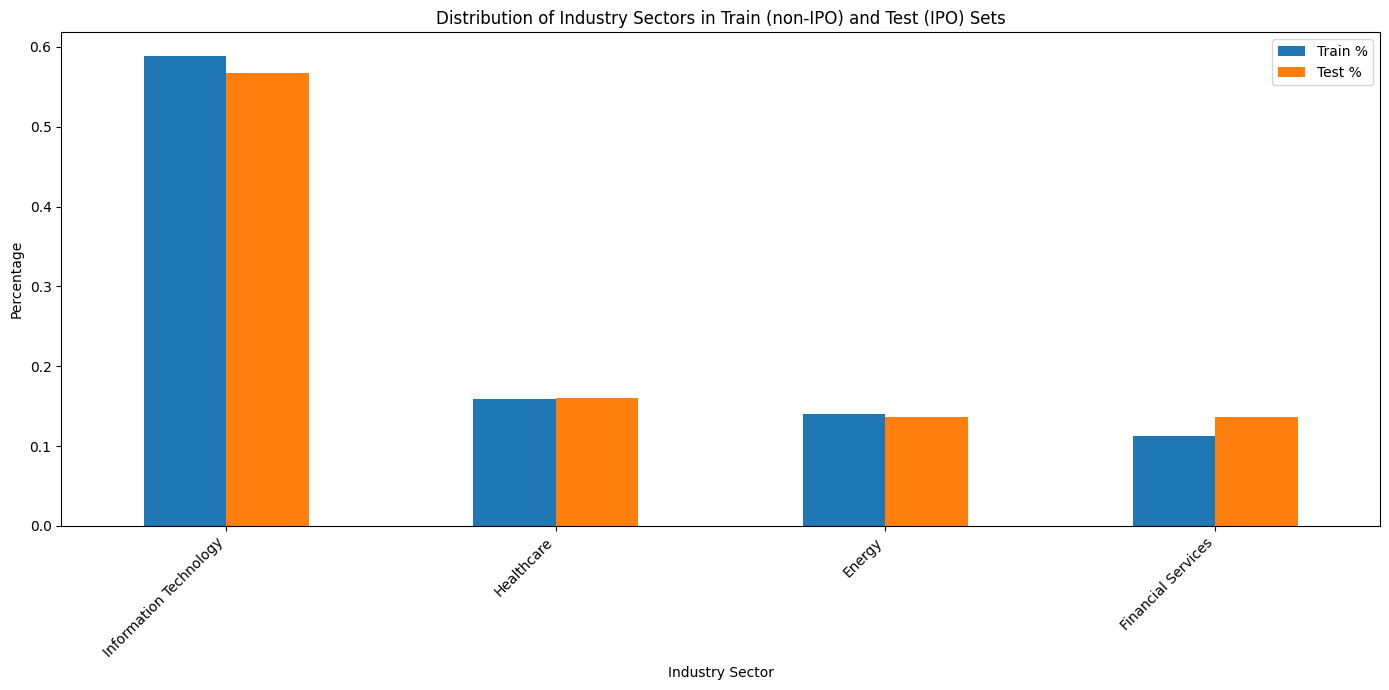


VC Round distribution:
            Train %  Test %
VC Round                   
5th Round  0.169355     0.0
2nd Round  0.161290     0.0
6th Round  0.145161     0.0
4th Round  0.137097     0.0
1st Round  0.104839     0.0
3rd Round  0.096774     0.0
7th Round  0.072581     0.0
Angel      0.048387     0.0
8th Round  0.040323     0.0
9th Round  0.016129     0.0


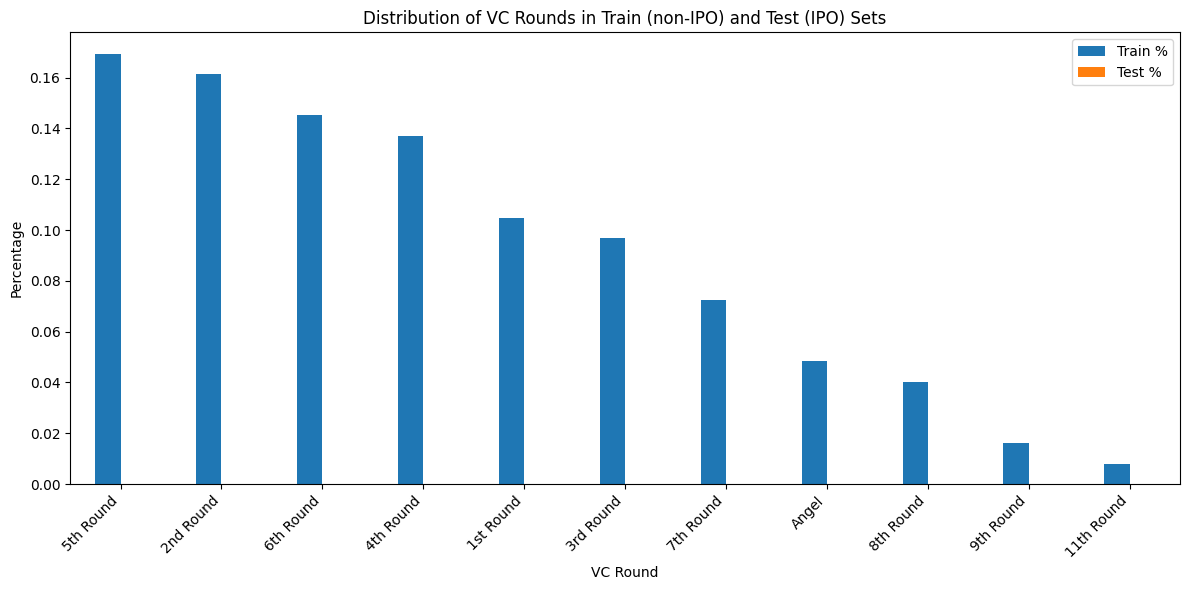

Training set: 214 samples
Test set: 81 samples

3. Setting up feature preprocessing pipelines...

4. Defining models for hyperparameter tuning...

5. Performing hyperparameter tuning...

Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014'

XGBoost - Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}
XGBoost - Test set MAPE: 57.14%

Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest - Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest - Test set MAPE: 55.74%

Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest - Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest - Test set MAPE: 55.74%

Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Gradient Boosting - Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_sa

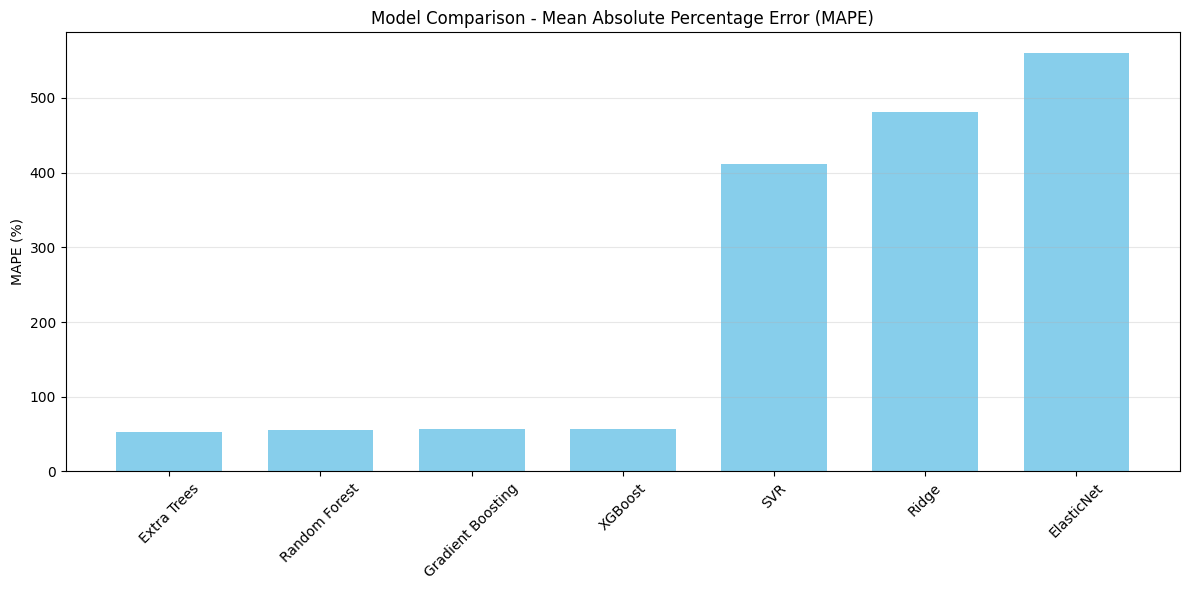


7. Selecting best model and analyzing results...
Best model: Extra Trees
Best model MAPE: 52.40%

Feature importances length: 159
Feature names length: 81

8. Analyzing model predictions...
Test set size before prediction: 81
Test companies count: N/A

Prediction summary statistics:
             Actual     Predicted  Percentage Error
count     81.000000     81.000000         81.000000
mean    1876.998765   1745.529286         52.402958
std     3950.792873   2941.380937        139.584322
min        0.120000      1.383522          0.320801
25%       25.510000     23.132711          9.171257
50%      118.020000     92.710737         17.584588
75%     1514.260000   2473.203514         36.763453
max    24155.000000  13690.074811       1052.934589

Sample of predictions (best to worst):
      Actual    Predicted  Percentage Error
188  9751.13  9782.411771          0.320801
248    66.37    66.671388          0.454103
150  8673.66  8610.027597          0.733628
164  1362.89  1374.820329      

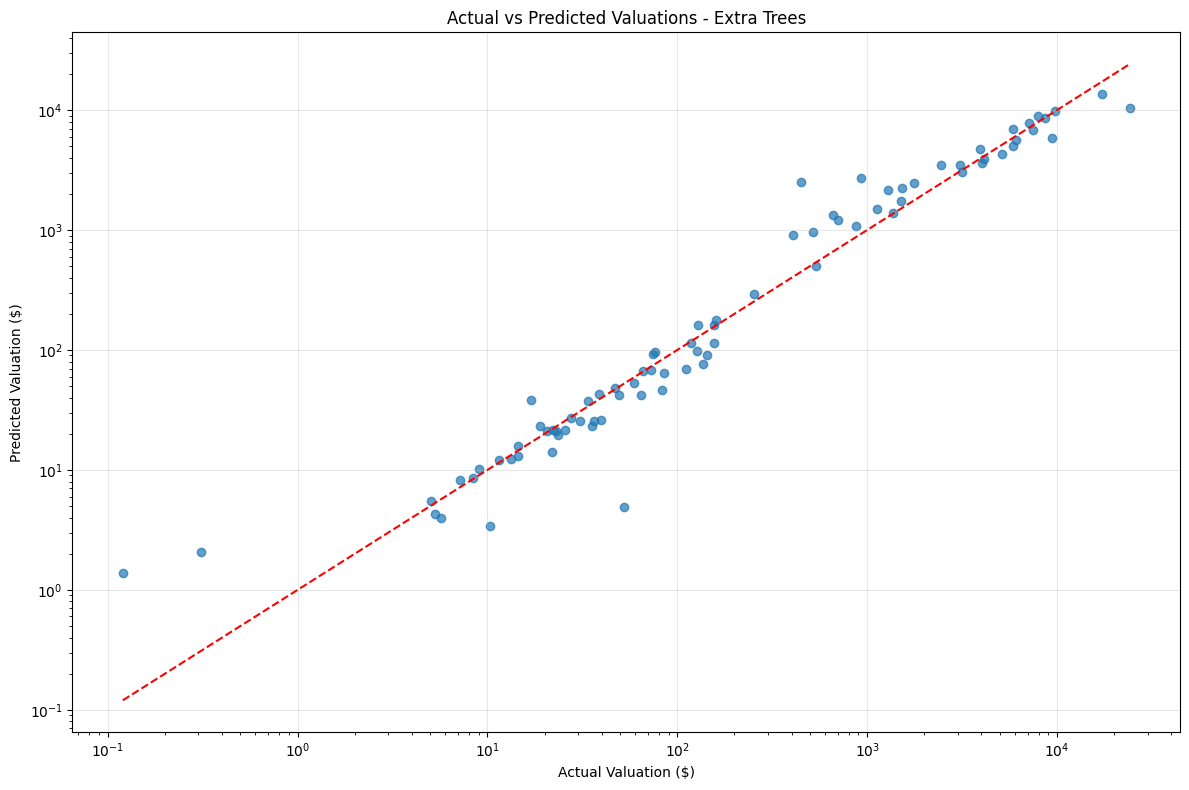

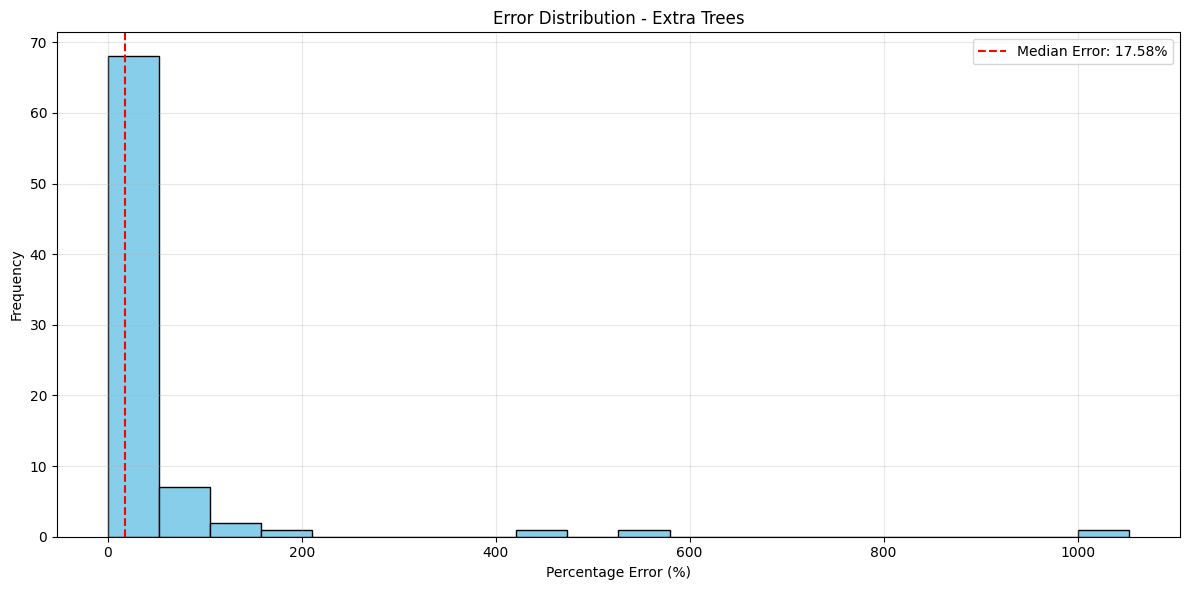


9. Saving the final model and preprocessing steps...
Model saved to saved_ipo_model/valuation_prediction_model.pkl
Feature information saved to saved_ipo_model/model_features.pkl

10. Pipeline Summary
-------------------
- Data: 295 valid samples


NameError: name 'company_id_col' is not defined

In [ ]:
# Standard ML Pipeline with Hyperparameter Tuning and Model Evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Define the target variable
target_variable = 'Post Valuation'

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom transformer for handling missing values in categorical features
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value='missing'):
        self.fill_value = fill_value
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).fillna(self.fill_value)

# 1. Data Preparation
print("\n1. Preparing data for machine learning...")

# Identify features for modeling based on domain knowledge
financial_features = [
    'Deal Size', 'Pre-money Valuation',
    'Revenue', 'EBITDA', 'Net Income', 'Gross Profit',
    'Employees', '# Investors', '# New Investors', '# Follow-on Investors',
    'Raised to Date', 'Total Invested Equity'
]

company_features = [
    'Primary Industry Sector', 'Primary Industry Group', 
    'Current Business Status', 'Current Financing Status',
    'Year Founded'
]

deal_features = [
    'Deal Type', 'VC Round', 'Financing Status'
]

# Combine all potential features
potential_features = financial_features + company_features + deal_features

# Filter to only include columns that actually exist in our dataset
selected_features = [col for col in potential_features if col in df.columns]
print(f"Selected {len(selected_features)} features for modeling:")
print(selected_features)

# Remove rows where target variable is missing
valid_data = df.dropna(subset=[target_variable]).reset_index(drop=True)
print(f"\nRows with valid target: {len(valid_data)} (out of {len(df)} total rows)")

# Separate features into numerical and categorical
numerical_features = []
categorical_features = []

for feature in selected_features:
    if feature == target_variable:
        continue
    
    if valid_data[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Create feature matrix and target vector
X = valid_data[selected_features].copy()
X = X.drop(columns=[target_variable], errors='ignore')
y = valid_data[target_variable]

# Apply log transformation to the target variable to handle skewness
y_log = np.log1p(y)

# 2. Create train/test split based on Deal Type (IPO vs non-IPO)
print("\n2. Creating special train-test split with IPO rounds in test set...")

# Check if 'Deal Type' column exists in the data
if 'Deal Type' in valid_data.columns:
    # Create mask for IPO deals
    ipo_mask = valid_data['Deal Type'] == "IPO"
    
    # Get indices for IPO and non-IPO deals
    ipo_indices = valid_data[ipo_mask].index
    non_ipo_indices = valid_data[~ipo_mask].index
    
    # Use these indices to create train/test split
    X_train, y_train = X.loc[non_ipo_indices], y_log.loc[non_ipo_indices]
    X_test, y_test = X.loc[ipo_indices], y_log.loc[ipo_indices]
    
    print(f"Train set (non-IPO rounds): {len(X_train)} samples")
    print(f"Test set (IPO rounds only): {len(X_test)} samples")
    
    # Show distribution of 'Deal Type' in train and test sets
    print("\nDeal Type distribution in train set:")
    print(valid_data.loc[non_ipo_indices, 'Deal Type'].value_counts())
    
    print("\nDeal Type distribution in test set:")
    print(valid_data.loc[ipo_indices, 'Deal Type'].value_counts())
    
    # Visualize industry distribution in train and test sets if available
    if 'Primary Industry Sector' in valid_data.columns:
        strat_column = 'Primary Industry Sector'
        
        # Get value counts for industries
        train_sectors = valid_data.loc[non_ipo_indices, strat_column].value_counts(normalize=True)
        test_sectors = valid_data.loc[ipo_indices, strat_column].value_counts(normalize=True)
        
        # Get the top sectors across both sets
        top_sectors = pd.concat([train_sectors, test_sectors]).index.unique()[:10]
        
        # Filter to only include top sectors
        train_dist = pd.DataFrame(train_sectors[train_sectors.index.isin(top_sectors)])
        test_dist = pd.DataFrame(test_sectors[test_sectors.index.isin(top_sectors)])
        
        # Combine into comparison dataframe
        dist_compare = pd.concat([train_dist, test_dist], axis=1)
        dist_compare.columns = ['Train %', 'Test %']
        dist_compare = dist_compare.fillna(0)  # Fill NaN values with 0
        
        # Display the comparison
        print("\nIndustry Sector distribution (top 10 sectors):")
        print(dist_compare.head(10))
        
        # Visualize sector distribution
        plt.figure(figsize=(14, 7))
        dist_compare.plot(kind='bar', ax=plt.gca())
        plt.title('Distribution of Industry Sectors in Train (non-IPO) and Test (IPO) Sets')
        plt.ylabel('Percentage')
        plt.xlabel('Industry Sector')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Visualize VC Round distribution in train and test sets if available
    if 'VC Round' in valid_data.columns:
        strat_column = 'VC Round'
        
        # Get value counts for VC Rounds
        train_rounds = valid_data.loc[non_ipo_indices, strat_column].value_counts(normalize=True)
        test_rounds = valid_data.loc[ipo_indices, strat_column].value_counts(normalize=True)
        
        # Create dataframe for comparison
        train_dist = pd.DataFrame(train_rounds)
        test_dist = pd.DataFrame(test_rounds)
        
        # Combine into comparison dataframe
        dist_compare = pd.concat([train_dist, test_dist], axis=1)
        dist_compare.columns = ['Train %', 'Test %']
        dist_compare = dist_compare.fillna(0)  # Fill NaN values with 0
        
        # Display the comparison
        print("\nVC Round distribution:")
        print(dist_compare.head(10))
        
        # Visualize VC Round distribution
        plt.figure(figsize=(12, 6))
        dist_compare.plot(kind='bar', ax=plt.gca())
        plt.title('Distribution of VC Rounds in Train (non-IPO) and Test (IPO) Sets')
        plt.ylabel('Percentage')
        plt.xlabel('VC Round')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
else:
    # Regular train/test split if Deal Type is not available
    print(f"Warning: 'Deal Type' column not found. Using regular train/test split.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_log, test_size=0.2, random_state=42
    )
    
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 3. Feature preprocessing
print("\n3. Setting up feature preprocessing pipelines...")

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', CategoricalImputer(fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
# Replace your numerical transformer with this to include interaction features
numerical_transformer_with_interactions = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('interactions', InteractionFeatureTransformer(interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

# Modify the preprocessor to use the new numerical transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_with_interactions, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Define models to evaluate
print("\n4. Defining models for hyperparameter tuning...")

# Dictionary of models to evaluate
models = {
    'XGBoost': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),  # Moved XGBoost to the top as the primary model
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Ridge': Ridge(random_state=42),
    'SVR': SVR()
}

# Define hyperparameter grids for each model
hyperparameters = {
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5]
    },

    'Extra Trees': {
        'model__n_estimators': [100, 200,300],
        'model__max_depth': [10, 20,30],
        'model__min_samples_split': [ 5,10,15]
    },
#    'Extra Trees': {
#     # Number of trees in the forest
#     'model__n_estimators': [50, 100, 200, 300, 500],
    
#     # Maximum depth of the tree
#     'model__max_depth': [None, 5, 10, 15, 20, 30],
    
#     # Minimum number of samples required to split an internal node
#     'model__min_samples_split': [2, 5, 10, 15, 20],
    
#     # Minimum number of samples required at each leaf node
#     'model__min_samples_leaf': [1, 2, 4, 8],
    
#     # Fraction of features to consider for best split
#     'model__max_features': ['sqrt', 'log2', None, 0.7, 0.8],
    
# #     # # Whether bootstrap samples are used when building trees
# #     'model__bootstrap': [True, False],
    
# #     # # Criterion used for split quality evaluation
# #     # 'model__criterion': ['squared_error', 'absolute_error', 'poisson'],
    
# #     # # Minimum weighted fraction of the sum total of weights required to be at a leaf node
# #     'model__min_weight_fraction_leaf': [0.0, 0.1],
    
# #     # # Controls randomness in the bootstrapping
# #     # 'model__random_state': [42]
# },
    'ElasticNet': {
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['rbf', 'linear']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 6],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8]
    }
}

# 5. Hyperparameter tuning and model evaluation
print("\n5. Performing hyperparameter tuning...")

results = {}
best_models = {}

# MAPE scoring function for GridSearchCV
def neg_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return -np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom MAPE scorer for GridSearchCV
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(neg_mean_absolute_percentage_error)

# Train and evaluate each model with grid search
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Grid search for hyperparameter tuning # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=hyperparameters[model_name],
        cv=5,
        scoring=mape_scorer,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit model
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions on test data
    y_pred_log = grid_search.predict(X_test)
    
    # Transform predictions and actual values back to original scale
    y_true = np.expm1(y_test)
    y_pred = np.expm1(y_pred_log)
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_test, y_pred_log)  # R² on log scale
    
    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R²': r2
    }
    
    print(f"{model_name} - Best parameters: {grid_search.best_params_}")
    print(f"{model_name} - Test set MAPE: {mape:.2f}%")

# 6. Compare model performances
print("\n6. Comparing model performances...")

# Create a dataframe with the results
results_df = pd.DataFrame()

for model_name, metrics in results.items():
    results_df.loc[model_name, 'MAE'] = metrics['MAE']
    results_df.loc[model_name, 'MAPE (%)'] = metrics['MAPE']
    results_df.loc[model_name, 'RMSE'] = metrics['RMSE']
    results_df.loc[model_name, 'R²'] = metrics['R²']

# Sort by MAPE (lower is better)
results_df = results_df.sort_values('MAPE (%)')
print("\nModel performance comparison (sorted by MAPE):")
print(results_df)

# Specifically analyze XGBoost performance
if 'XGBoost' in results:
    print("\nDetailed XGBoost Performance Analysis:")
    xgb_results = results['XGBoost']
    print(f"XGBoost MAPE: {xgb_results['MAPE']:.2f}%")
    print(f"XGBoost RMSE: {xgb_results['RMSE']:.2f}")
    print(f"XGBoost Best Parameters: {xgb_results['Best Parameters']}")
    
    # If XGBoost is not the best model, compare with the best
    best_model_name = results_df.index[0]
    if best_model_name != 'XGBoost':
        best_mape = results[best_model_name]['MAPE']
        xgb_mape = xgb_results['MAPE']
        diff = xgb_mape - best_mape
        print(f"XGBoost vs Best Model ({best_model_name}): {diff:.2f}% difference in MAPE")

# Visualize results
plt.figure(figsize=(12, 6))
bar_width = 0.7
plt.bar(results_df.index, results_df['MAPE (%)'], width=bar_width, color='skyblue')
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.xticks(rotation=45)
plt.ylabel('MAPE (%)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Select the best model
print("\n7. Selecting best model and analyzing results...")

best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print(f"Best model MAPE: {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")

# Feature importance for tree-based models
if hasattr(best_model['model'], 'feature_importances_'):
    # Get feature names from preprocessor
    try:
        # Get feature names from the feature extraction
        cat_features = best_model['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
        all_features = numerical_features + list(cat_features)
        
        # Get feature importances
        importances = best_model['model'].feature_importances_
        
        # Check if the number of features matches
        if len(importances) == len(all_features):
            # Create feature importance dataframe
            feature_importance = pd.DataFrame({
                'Feature': all_features,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False)
            
            # Plot top 20 features
            top_n = min(20, len(feature_importance))
            plt.figure(figsize=(12, 8))
            plt.barh(feature_importance['Feature'][:top_n][::-1], 
                    feature_importance['Importance'][:top_n][::-1])
            plt.title(f'Top {top_n} Feature Importances - {best_model_name}')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()
            
            print("\nTop 10 most important features:")
            print(feature_importance.head(10))
        else:
            print("\nWarning: Feature importances shape doesn't match feature names.")
            print(f"Feature importances length: {len(importances)}")
            print(f"Feature names length: {len(all_features)}")
    except Exception as e:
        print(f"\nError extracting feature importances: {e}")

# 8. Analyzing model predictions...
print("\n8. Analyzing model predictions...")

# Verify test set size
print(f"Test set size before prediction: {len(X_test)}")
print(f"Test companies count: {len(X_test['Companies'].unique()) if 'Companies' in X_test.columns else 'N/A'}")

# Generate predictions on test data using the best model
y_pred_log = best_model.predict(X_test)
y_true = np.expm1(y_test)
y_pred = np.expm1(y_pred_log)

# Double check shapes match
assert len(y_true) == len(y_pred) == len(X_test), "Prediction array lengths don't match"

# Create a dataframe with the results
predictions_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred,
    'Absolute Error': np.abs(y_true - y_pred),
    'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
})

# Add original features from test set to predictions dataframe
# predictions_df = pd.concat([predictions_df, X_test.reset_index(drop=True)], axis=1)

# Sort by percentage error
predictions_df = predictions_df.sort_values('Percentage Error')

print("\nPrediction summary statistics:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].describe())

print("\nSample of predictions (best to worst):")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].head(5))
print("\nWorst predictions:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].tail(5))

# Count predictions within certain error margins
error_margins = [10, 25, 50, 100]
for margin in error_margins:
    count = (predictions_df['Percentage Error'] <= margin).sum()
    percentage = (count / len(predictions_df)) * 100
    print(f"Predictions within {margin}% error: {count}/{len(predictions_df)} ({percentage:.1f}%)")

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_true, y_pred, alpha=0.7)

# Add diagonal line (perfect prediction)
max_val = max(max(y_true), max(y_pred))
min_val = min(min(y_true), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], '--r')

# Make axes logarithmic
plt.xscale('log')
plt.yscale('log')

# Add labels
plt.xlabel('Actual Valuation ($)')
plt.ylabel('Predicted Valuation ($)')
plt.title(f'Actual vs Predicted Valuations - {best_model_name}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot error distribution
plt.figure(figsize=(12, 6))
plt.hist(predictions_df['Percentage Error'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(predictions_df['Percentage Error'].median(), color='r', linestyle='--', 
           label=f'Median Error: {predictions_df["Percentage Error"].median():.2f}%')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title(f'Error Distribution - {best_model_name}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Save the final model and preprocessing pipeline
print("\n9. Saving the final model and preprocessing steps...")

# Create model directory if it doesn't exist
model_dir = 'saved_ipo_model'
os.makedirs(model_dir, exist_ok=True)

# Save model
model_filename = f"{model_dir}/valuation_prediction_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Save feature list
feature_filename = f"{model_dir}/model_features.pkl"
with open(feature_filename, 'wb') as file:
    features_dict = {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'target_variable': target_variable
    }
    pickle.dump(features_dict, file)

print(f"Model saved to {model_filename}")
print(f"Feature information saved to {feature_filename}")

# Create a function for making new predictions with the saved model
def predict_valuation(model, new_data, feature_info):
    """Predict company valuation using the trained model.
    
    Parameters:
    -----------
    model : scikit-learn Pipeline
        Trained model pipeline with preprocessing steps
    new_data : pandas DataFrame
        Data containing features for prediction
    feature_info : dict
        Dictionary containing feature information
        
    Returns:
    --------
    float
        Predicted valuation
    """
    # Ensure all required features are present
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    missing_features = [f for f in required_features if f not in new_data.columns]
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with NaN values
        for feature in missing_features:
            new_data[feature] = np.nan
    
    # Keep only required features
    new_data = new_data[required_features]
    
    # Make prediction (log-transformed)
    y_pred_log = model.predict(new_data)
    
    # Transform back to original scale
    y_pred = np.expm1(y_pred_log)
    
    return y_pred



# # Final summary
# print("\n10. Pipeline Summary")
# print("-------------------")
# print(f"- Data: {len(valid_data)} valid samples")
# print(f"- Train-test split: 75-25 company-based with {'all train company rounds in training, only latest test company round in testing' if company_id_col in valid_data.columns else 'random'} strategy")
# print(f"- Features: {len(numerical_features)} numerical, {len(categorical_features)} categorical")
# print(f"- Best model: {best_model_name}")
# print(f"- Performance: MAPE = {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")
# print(f"- Model saved to: {model_filename}")
# print("-------------------")


1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 295 (out of 295 total rows)

Numerical features: 13
Categorical features: 7

2. Alternative Method: Creating train-test split with IPO deals only (75-25)...
IPO deals found: 81 out of 295 total records
IPO-only Train set: 60 samples
IPO-only Test set: 21 samples

IPO-only: Industry Sector distribution (top 10 sectors):
                          Train %    Test %
Primary Industry Sector                    
Information Technology   0.550000  0.619048
Healthcare               0.200000  0.047619
Financial Services       0.1

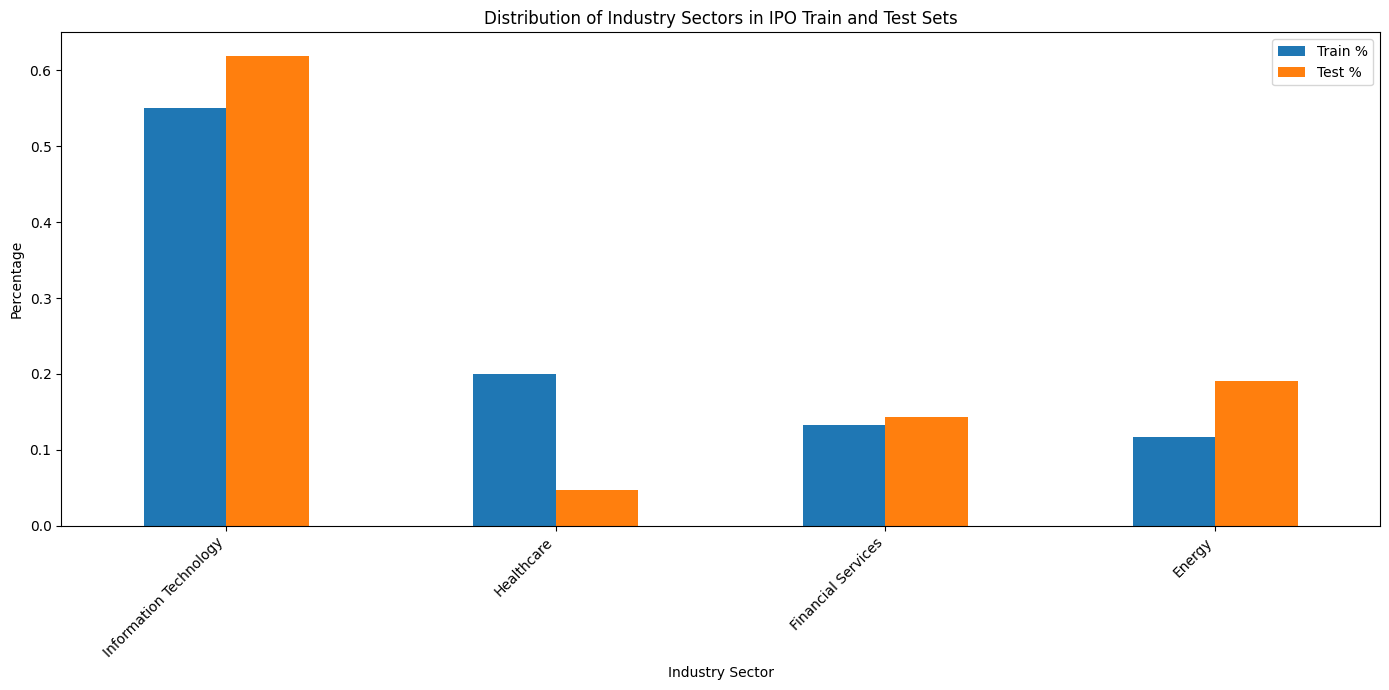

Training set: 60 samples
Test set: 21 samples

3. Setting up feature preprocessing pipelines...

4. Defining models for hyperparameter tuning...

5. Performing hyperparameter tuning...

Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014'

XGBoost - Best parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
XGBoost - Test set MAPE: 15.98%

Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest - Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Random Forest - Test set MAPE: 13.03%

Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Gradient Boosting - Best parameters: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Gradient Boosting - Test set MAPE: 14.96%

Tuning hyperparameters for Extra Trees...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Extra Trees - Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimat

/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.426e-01, tolerance: 2.957e-02
  model = cd_fast.enet_coordinate_descent(
/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.985e-01, tolerance: 2.405e-02
  model = cd_fast.enet_coordinate_descent(
/home/yasir/miniconda3/envs/openai/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

ElasticNet - Best parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.5}
ElasticNet - Test set MAPE: 131689.11%

Tuning hyperparameters for Ridge...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Ridge - Best parameters: {'model__alpha': 10.0}
Ridge - Test set MAPE: 1561563677227445.00%

Tuning hyperparameters for SVR...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVR - Best parameters: {'model__C': 10.0, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
SVR - Test set MAPE: 142.86%

6. Comparing model performances...

Model performance comparison (sorted by MAPE):
                            MAE      MAPE (%)          RMSE        R²
Extra Trees        1.352778e+02  1.294933e+01  2.295455e+02  0.995100
Random Forest      2.771969e+02  1.303412e+01  6.564247e+02  0.995333
Gradient Boosting  2.082125e+02  1.495971e+01  4.345202e+02  0.992189
XGBoost            2.426180e+02  1.597732e+01  5.293213e+02  0.989871
SVR                1.817589e+03  1.428583e+02 

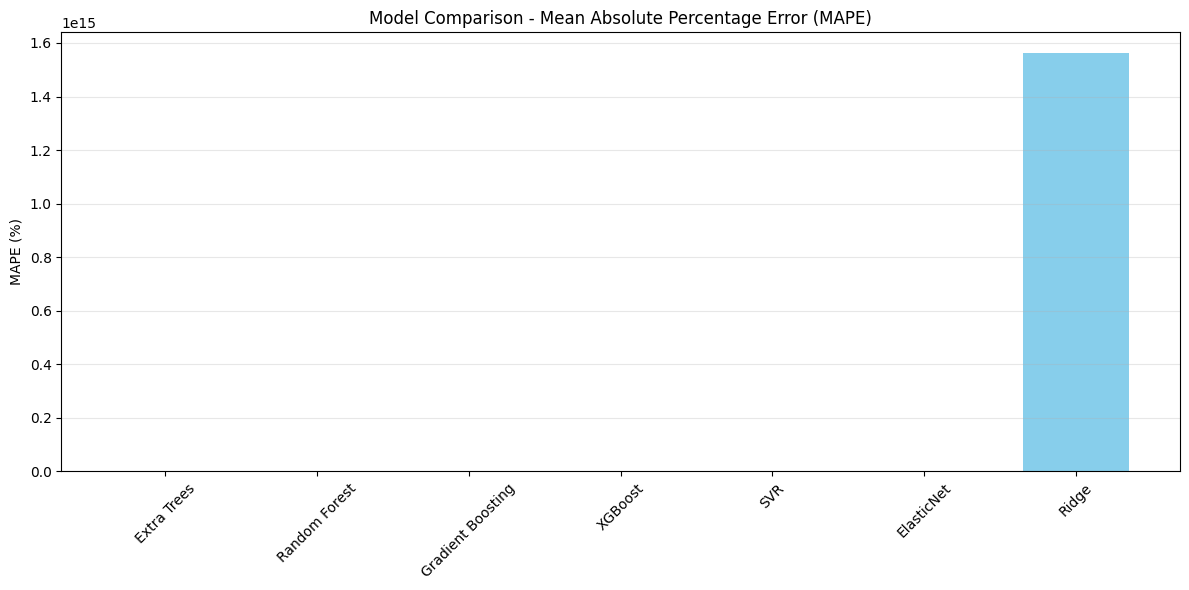


7. Selecting best model and analyzing results...
Best model: Extra Trees
Best model MAPE: 12.95%

Feature importances length: 129
Feature names length: 51

8. Analyzing model predictions...
Test set size before prediction: 21
Test companies count: N/A

Prediction summary statistics:
            Actual    Predicted  Percentage Error
count    21.000000    21.000000         21.000000
mean   1998.401905  1919.179141         12.949330
std    3038.546965  2863.831843         16.068510
min       5.270000     5.428593          3.009362
25%      27.590000    25.516058          5.586497
50%     156.510000   146.469416          8.233885
75%    3952.690000  3789.784546         12.378307
max    9751.130000  9383.240453         77.258214

Sample of predictions (best to worst):
     Actual    Predicted  Percentage Error
30     5.27     5.428593          3.009362
55  3952.69  3810.849427          3.588457
49  9751.13  9383.240453          3.772789
31  5855.25  5627.649740          3.887114
73  5149.4

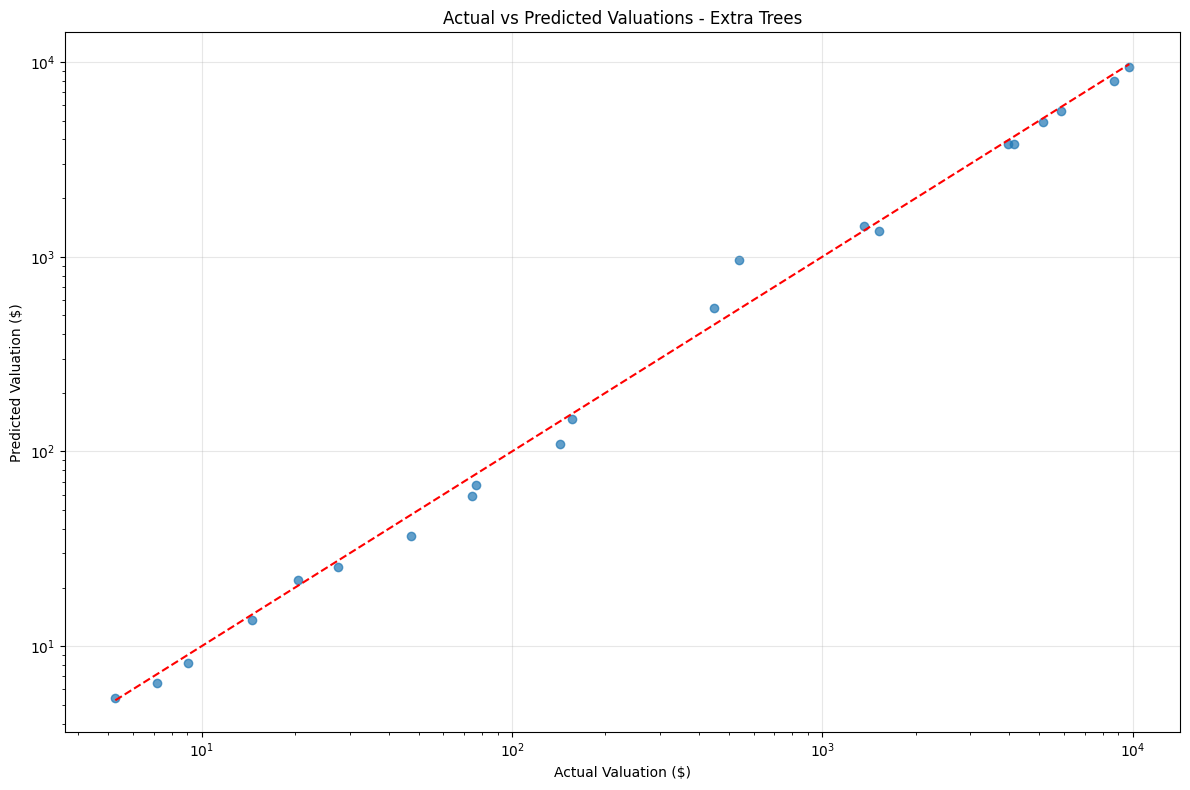

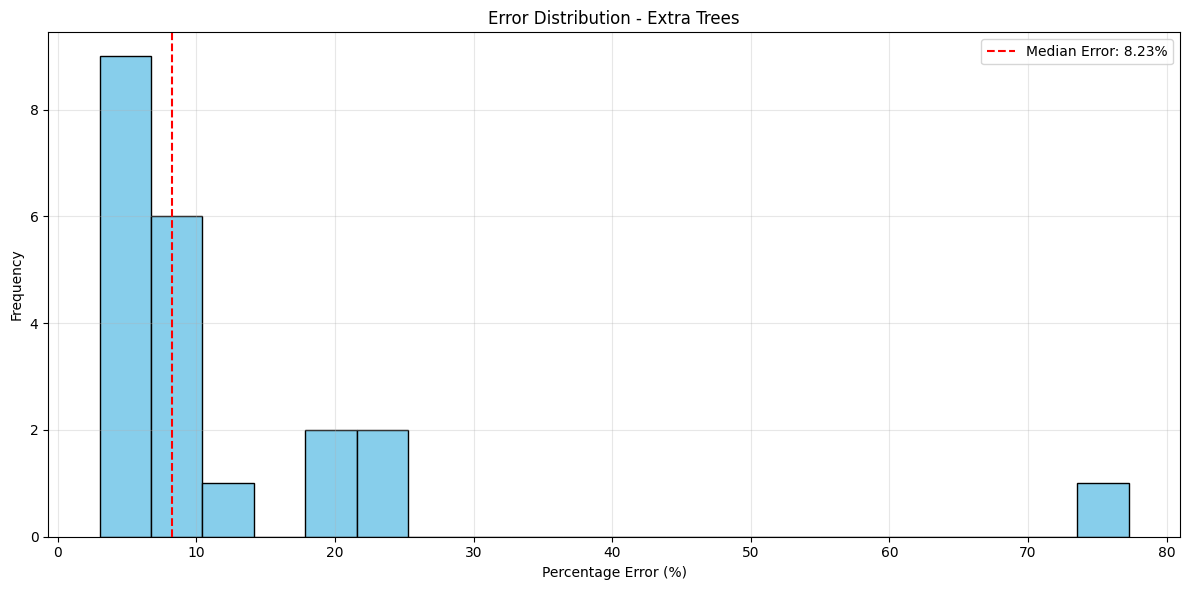


9. Saving the final model and preprocessing steps...
Model saved to saved_ipo_model/valuation_prediction_model.pkl
Feature information saved to saved_ipo_model/model_features.pkl


In [8]:
# Standard ML Pipeline with Hyperparameter Tuning and Model Evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Define the target variable
target_variable = 'Post Valuation'

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom transformer for handling missing values in categorical features
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value='missing'):
        self.fill_value = fill_value
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).fillna(self.fill_value)

# 1. Data Preparation
print("\n1. Preparing data for machine learning...")

# Identify features for modeling based on domain knowledge
financial_features = [
    'Deal Size', 'Pre-money Valuation',
    'Revenue', 'EBITDA', 'Net Income', 'Gross Profit',
    'Employees', '# Investors', '# New Investors', '# Follow-on Investors',
    'Raised to Date', 'Total Invested Equity'
]

company_features = [
    'Primary Industry Sector', 'Primary Industry Group', 
    'Current Business Status', 'Current Financing Status',
    'Year Founded'
]

deal_features = [
    'Deal Type', 'VC Round', 'Financing Status'
]

# Combine all potential features
potential_features = financial_features + company_features + deal_features

# Filter to only include columns that actually exist in our dataset
selected_features = [col for col in potential_features if col in df.columns]
print(f"Selected {len(selected_features)} features for modeling:")
print(selected_features)

# Remove rows where target variable is missing
valid_data = df.dropna(subset=[target_variable]).reset_index(drop=True)
print(f"\nRows with valid target: {len(valid_data)} (out of {len(df)} total rows)")

# Separate features into numerical and categorical
numerical_features = []
categorical_features = []

for feature in selected_features:
    if feature == target_variable:
        continue
    
    if valid_data[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Create feature matrix and target vector
X = valid_data[selected_features].copy()
X = X.drop(columns=[target_variable], errors='ignore')
y = valid_data[target_variable]

# Apply log transformation to the target variable to handle skewness
y_log = np.log1p(y)
# 2. Alternative Method: IPO-Only Train-Test Split (75-25)
print("\n2. Alternative Method: Creating train-test split with IPO deals only (75-25)...")

# Process data with IPO deals only
if 'Deal Type' in valid_data.columns:
    # Filter to keep only IPO deals
    ipo_data = valid_data[valid_data['Deal Type'] == "IPO"].reset_index(drop=True)
    print(f"IPO deals found: {len(ipo_data)} out of {len(valid_data)} total records")
    
    if len(ipo_data) > 0:
        # Create feature matrix and target vector for IPO deals only
        X_ipo = ipo_data[selected_features].copy()
        X_ipo = X_ipo.drop(columns=[target_variable], errors='ignore')
        y_ipo = ipo_data[target_variable]
        y_ipo_log = np.log1p(y_ipo)
        
        # Create a 75-25 train-test split of IPO data only
        X_train_ipo, X_test_ipo, y_train_ipo, y_test_ipo = train_test_split(
            X_ipo, y_ipo_log, test_size=0.25, random_state=42
        )
        
        print(f"IPO-only Train set: {len(X_train_ipo)} samples")
        print(f"IPO-only Test set: {len(X_test_ipo)} samples")
        
        # Visualize industry distribution in IPO train and test sets
        if 'Primary Industry Sector' in ipo_data.columns:
            train_sectors = ipo_data.loc[X_train_ipo.index, 'Primary Industry Sector'].value_counts(normalize=True)
            test_sectors = ipo_data.loc[X_test_ipo.index, 'Primary Industry Sector'].value_counts(normalize=True)
            
            # Get the top sectors across both sets
            top_sectors = pd.concat([train_sectors, test_sectors]).index.unique()[:10]
            
            # Filter to only include top sectors
            train_dist = pd.DataFrame(train_sectors[train_sectors.index.isin(top_sectors)])
            test_dist = pd.DataFrame(test_sectors[test_sectors.index.isin(top_sectors)])
            
            # Combine into comparison dataframe
            dist_compare = pd.concat([train_dist, test_dist], axis=1)
            dist_compare.columns = ['Train %', 'Test %']
            dist_compare = dist_compare.fillna(0)  # Fill NaN values with 0
            
            # Display the comparison
            print("\nIPO-only: Industry Sector distribution (top 10 sectors):")
            print(dist_compare.head(10))
            
            # Visualize sector distribution
            plt.figure(figsize=(14, 7))
            dist_compare.plot(kind='bar', ax=plt.gca())
            plt.title('Distribution of Industry Sectors in IPO Train and Test Sets')
            plt.ylabel('Percentage')
            plt.xlabel('Industry Sector')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
        # Visualize funding round distribution if available
    #     if 'VC Round' in ipo_data.columns:
    #         train_rounds = ipo_data.loc[X_train_ipo.index, 'VC Round'].value_counts(normalize=True)
    #         test_rounds = ipo_data.loc[X_test_ipo.index, 'VC Round'].value_counts(normalize=True)
            
    #         # Create dataframe for comparison
    #         train_dist = pd.DataFrame(train_rounds)
    #         test_dist = pd.DataFrame(test_rounds)
            
    #         # Combine into comparison dataframe
    #         dist_compare = pd.concat([train_dist, test_dist], axis=1)
    #         dist_compare.columns = ['Train %', 'Test %']
    #         dist_compare = dist_compare.fillna(0)  # Fill NaN values with 0
            
    #         # Display the comparison
    #         print("\nIPO-only: VC Round distribution:")
    #         print(dist_compare.head(10))
            
    #         # Visualize VC Round distribution
    #         plt.figure(figsize=(12, 6))
    #         dist_compare.plot(kind='bar', ax=plt.gca())
    #         plt.title('Distribution of VC Rounds in IPO Train and Test Sets')
    #         plt.ylabel('Percentage')
    #         plt.xlabel('VC Round')
    #         plt.xticks(rotation=45, ha='right')
    #         plt.tight_layout()
    #         plt.show()
            
    #     # To use this split instead of the regular split, you would replace:
    #     # X_train, y_train with X_train_ipo, y_train_ipo
    #     # X_test, y_test with X_test_ipo, y_test_ipo
        
    #     print("\nTo use this IPO-only split, replace the standard train/test variables with the _ipo variants")
    #     print("X_train, y_train → X_train_ipo, y_train_ipo")
    #     print("X_test, y_test → X_test_ipo, y_test_ipo")
    # else:
    #     print("No IPO deals found in the dataset. Cannot create IPO-only train-test split.")
else:
    print("Warning: 'Deal Type' column not found. Cannot filter for IPO deals.")


print(f"Training set: {X_train_ipo.shape[0]} samples")
print(f"Test set: {X_test_ipo.shape[0]} samples")

# 3. Feature preprocessing
print("\n3. Setting up feature preprocessing pipelines...")

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', CategoricalImputer(fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
# Replace your numerical transformer with this to include interaction features
numerical_transformer_with_interactions = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('interactions', InteractionFeatureTransformer(interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler())
])

# Modify the preprocessor to use the new numerical transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_with_interactions, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Define models to evaluate
print("\n4. Defining models for hyperparameter tuning...")

# Dictionary of models to evaluate
models = {
    'XGBoost': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),  # Moved XGBoost to the top as the primary model
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Ridge': Ridge(random_state=42),
    'SVR': SVR()
}

# Define hyperparameter grids for each model
hyperparameters = {
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5]
    },

    'Extra Trees': {
        'model__n_estimators': [100, 200,300],
        'model__max_depth': [10, 20,30],
        'model__min_samples_split': [ 5,10,15]
    },
#    'Extra Trees': {
#     # Number of trees in the forest
#     'model__n_estimators': [50, 100, 200, 300, 500],
    
#     # Maximum depth of the tree
#     'model__max_depth': [None, 5, 10, 15, 20, 30],
    
#     # Minimum number of samples required to split an internal node
#     'model__min_samples_split': [2, 5, 10, 15, 20],
    
#     # Minimum number of samples required at each leaf node
#     'model__min_samples_leaf': [1, 2, 4, 8],
    
#     # Fraction of features to consider for best split
#     'model__max_features': ['sqrt', 'log2', None, 0.7, 0.8],
    
# #     # # Whether bootstrap samples are used when building trees
# #     'model__bootstrap': [True, False],
    
# #     # # Criterion used for split quality evaluation
# #     # 'model__criterion': ['squared_error', 'absolute_error', 'poisson'],
    
# #     # # Minimum weighted fraction of the sum total of weights required to be at a leaf node
# #     'model__min_weight_fraction_leaf': [0.0, 0.1],
    
# #     # # Controls randomness in the bootstrapping
# #     # 'model__random_state': [42]
# },
    'ElasticNet': {
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['rbf', 'linear']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 6],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8]
    }
}

# 5. Hyperparameter tuning and model evaluation
print("\n5. Performing hyperparameter tuning...")

results = {}
best_models = {}

# MAPE scoring function for GridSearchCV
def neg_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return -np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom MAPE scorer for GridSearchCV
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(neg_mean_absolute_percentage_error)

# Train and evaluate each model with grid search
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Grid search for hyperparameter tuning # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=hyperparameters[model_name],
        cv=5,
        scoring=mape_scorer,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit model
    grid_search.fit(X_train_ipo, y_train_ipo)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions on test data
    y_pred_log = grid_search.predict(X_test_ipo)
    
    # Transform predictions and actual values back to original scale
    y_true = np.expm1(y_test_ipo)
    y_pred = np.expm1(y_pred_log)
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_test_ipo, y_pred_log)  # R² on log scale
    
    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R²': r2
    }
    
    print(f"{model_name} - Best parameters: {grid_search.best_params_}")
    print(f"{model_name} - Test set MAPE: {mape:.2f}%")

# 6. Compare model performances
print("\n6. Comparing model performances...")

# Create a dataframe with the results
results_df = pd.DataFrame()

for model_name, metrics in results.items():
    results_df.loc[model_name, 'MAE'] = metrics['MAE']
    results_df.loc[model_name, 'MAPE (%)'] = metrics['MAPE']
    results_df.loc[model_name, 'RMSE'] = metrics['RMSE']
    results_df.loc[model_name, 'R²'] = metrics['R²']

# Sort by MAPE (lower is better)
results_df = results_df.sort_values('MAPE (%)')
print("\nModel performance comparison (sorted by MAPE):")
print(results_df)

# Specifically analyze XGBoost performance
if 'XGBoost' in results:
    print("\nDetailed XGBoost Performance Analysis:")
    xgb_results = results['XGBoost']
    print(f"XGBoost MAPE: {xgb_results['MAPE']:.2f}%")
    print(f"XGBoost RMSE: {xgb_results['RMSE']:.2f}")
    print(f"XGBoost Best Parameters: {xgb_results['Best Parameters']}")
    
    # If XGBoost is not the best model, compare with the best
    best_model_name = results_df.index[0]
    if best_model_name != 'XGBoost':
        best_mape = results[best_model_name]['MAPE']
        xgb_mape = xgb_results['MAPE']
        diff = xgb_mape - best_mape
        print(f"XGBoost vs Best Model ({best_model_name}): {diff:.2f}% difference in MAPE")

# Visualize results
plt.figure(figsize=(12, 6))
bar_width = 0.7
plt.bar(results_df.index, results_df['MAPE (%)'], width=bar_width, color='skyblue')
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.xticks(rotation=45)
plt.ylabel('MAPE (%)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Select the best model
print("\n7. Selecting best model and analyzing results...")

best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print(f"Best model MAPE: {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")

# Feature importance for tree-based models
if hasattr(best_model['model'], 'feature_importances_'):
    # Get feature names from preprocessor
    try:
        # Get feature names from the feature extraction
        cat_features = best_model['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
        all_features = numerical_features + list(cat_features)
        
        # Get feature importances
        importances = best_model['model'].feature_importances_
        
        # Check if the number of features matches
        if len(importances) == len(all_features):
            # Create feature importance dataframe
            feature_importance = pd.DataFrame({
                'Feature': all_features,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False)
            
            # Plot top 20 features
            top_n = min(20, len(feature_importance))
            plt.figure(figsize=(12, 8))
            plt.barh(feature_importance['Feature'][:top_n][::-1], 
                    feature_importance['Importance'][:top_n][::-1])
            plt.title(f'Top {top_n} Feature Importances - {best_model_name}')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()
            
            print("\nTop 10 most important features:")
            print(feature_importance.head(10))
        else:
            print("\nWarning: Feature importances shape doesn't match feature names.")
            print(f"Feature importances length: {len(importances)}")
            print(f"Feature names length: {len(all_features)}")
    except Exception as e:
        print(f"\nError extracting feature importances: {e}")

# 8. Analyzing model predictions...
print("\n8. Analyzing model predictions...")

# Verify test set size
print(f"Test set size before prediction: {len(X_test_ipo)}")
print(f"Test companies count: {len(X_test_ipo['Companies'].unique()) if 'Companies' in X_test_ipo.columns else 'N/A'}")

# Generate predictions on test data using the best model
y_pred_log = best_model.predict(X_test_ipo)
y_true = np.expm1(y_test_ipo)
y_pred = np.expm1(y_pred_log)

# Double check shapes match
assert len(y_true) == len(y_pred) == len(X_test_ipo), "Prediction array lengths don't match"

# Create a dataframe with the results
predictions_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred,
    'Absolute Error': np.abs(y_true - y_pred),
    'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
})

# Add original features from test set to predictions dataframe
# predictions_df = pd.concat([predictions_df, X_test.reset_index(drop=True)], axis=1)

# Sort by percentage error
predictions_df = predictions_df.sort_values('Percentage Error')

print("\nPrediction summary statistics:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].describe())

print("\nSample of predictions (best to worst):")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].head(5))
print("\nWorst predictions:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].tail(5))

# Count predictions within certain error margins
error_margins = [10, 25, 50, 100]
for margin in error_margins:
    count = (predictions_df['Percentage Error'] <= margin).sum()
    percentage = (count / len(predictions_df)) * 100
    print(f"Predictions within {margin}% error: {count}/{len(predictions_df)} ({percentage:.1f}%)")

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_true, y_pred, alpha=0.7)

# Add diagonal line (perfect prediction)
max_val = max(max(y_true), max(y_pred))
min_val = min(min(y_true), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], '--r')

# Make axes logarithmic
plt.xscale('log')
plt.yscale('log')

# Add labels
plt.xlabel('Actual Valuation ($)')
plt.ylabel('Predicted Valuation ($)')
plt.title(f'Actual vs Predicted Valuations - {best_model_name}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot error distribution
plt.figure(figsize=(12, 6))
plt.hist(predictions_df['Percentage Error'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(predictions_df['Percentage Error'].median(), color='r', linestyle='--', 
           label=f'Median Error: {predictions_df["Percentage Error"].median():.2f}%')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title(f'Error Distribution - {best_model_name}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Save the final model and preprocessing pipeline
print("\n9. Saving the final model and preprocessing steps...")

# Create model directory if it doesn't exist
model_dir = 'saved_ipo_model'
os.makedirs(model_dir, exist_ok=True)

# Save model
model_filename = f"{model_dir}/valuation_prediction_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Save feature list
feature_filename = f"{model_dir}/model_features.pkl"
with open(feature_filename, 'wb') as file:
    features_dict = {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'target_variable': target_variable
    }
    pickle.dump(features_dict, file)

print(f"Model saved to {model_filename}")
print(f"Feature information saved to {feature_filename}")

# Create a function for making new predictions with the saved model
def predict_valuation(model, new_data, feature_info):
    """Predict company valuation using the trained model.
    
    Parameters:
    -----------
    model : scikit-learn Pipeline
        Trained model pipeline with preprocessing steps
    new_data : pandas DataFrame
        Data containing features for prediction
    feature_info : dict
        Dictionary containing feature information
        
    Returns:
    --------
    float
        Predicted valuation
    """
    # Ensure all required features are present
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    missing_features = [f for f in required_features if f not in new_data.columns]
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with NaN values
        for feature in missing_features:
            new_data[feature] = np.nan
    
    # Keep only required features
    new_data = new_data[required_features]
    
    # Make prediction (log-transformed)
    y_pred_log = model.predict(new_data)
    
    # Transform back to original scale
    y_pred = np.expm1(y_pred_log)
    
    return y_pred



# # Final summary
# print("\n10. Pipeline Summary")
# print("-------------------")
# print(f"- Data: {len(valid_data)} valid samples")
# print(f"- Train-test split: 75-25 company-based with {'all train company rounds in training, only latest test company round in testing' if company_id_col in valid_data.columns else 'random'} strategy")
# print(f"- Features: {len(numerical_features)} numerical, {len(categorical_features)} categorical")
# print(f"- Best model: {best_model_name}")
# print(f"- Performance: MAPE = {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")
# print(f"- Model saved to: {model_filename}")
# print("-------------------")

Processing combined_test_with_urls.csv...
Loaded 4 rows from combined_test_with_urls.csv
Model loaded from saved_model/valuation_prediction_model.pkl
Feature info loaded from saved_model/model_features.pkl

Model expects 20 features:
- 13 numerical features
- 7 categorical features

Found 4 rows with valid target values for evaluation
Number of unique companies: 2

Feature data types:
float64    9
object     7
int64      4
Name: count, dtype: int64

Generating predictions...

Overall Metrics:
MAE: $95.69
RMSE: $156.31
MAPE: 8.91%

Row-by-row Predictions (sorted by error):
                      Company   Actual  Predicted  Percentage Error
2                      Zenjob  $133.20    $133.57             $0.28
0  Zilch (Financial Software)  $507.51    $469.54             $7.48
3                      Zenjob  $382.67    $346.45             $9.46
1  Zilch (Financial Software) $1675.07   $1366.88            $18.40

Error Distribution:
count    $4.00
mean     $8.91
std      $7.46
min      $0.28


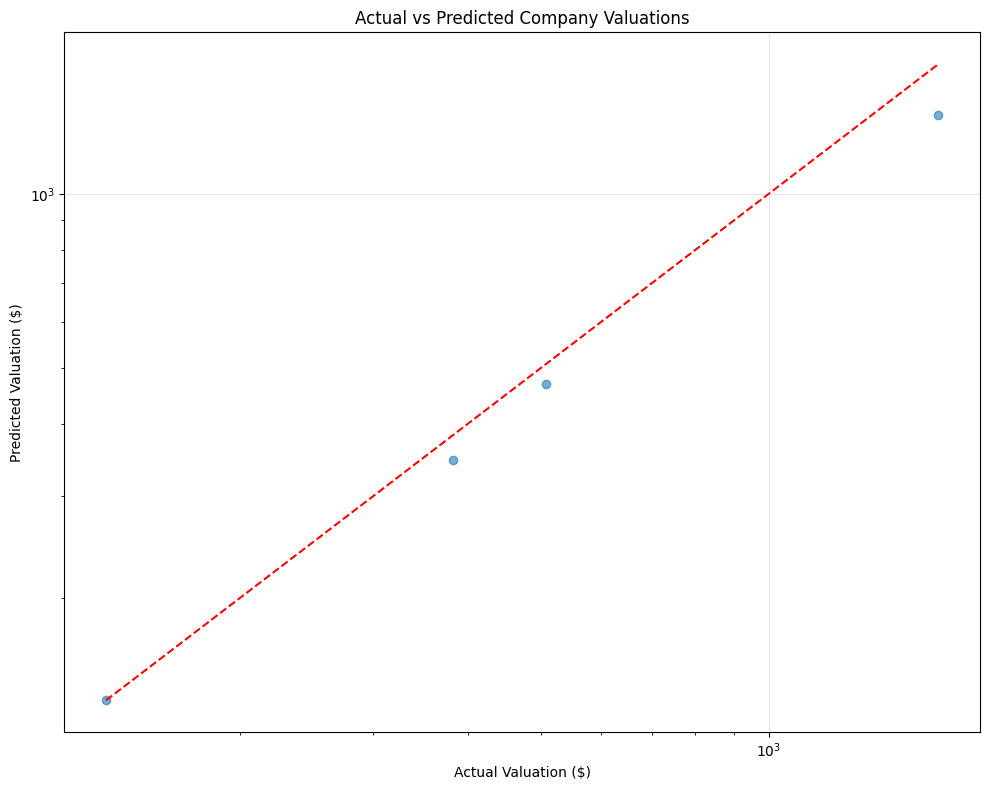

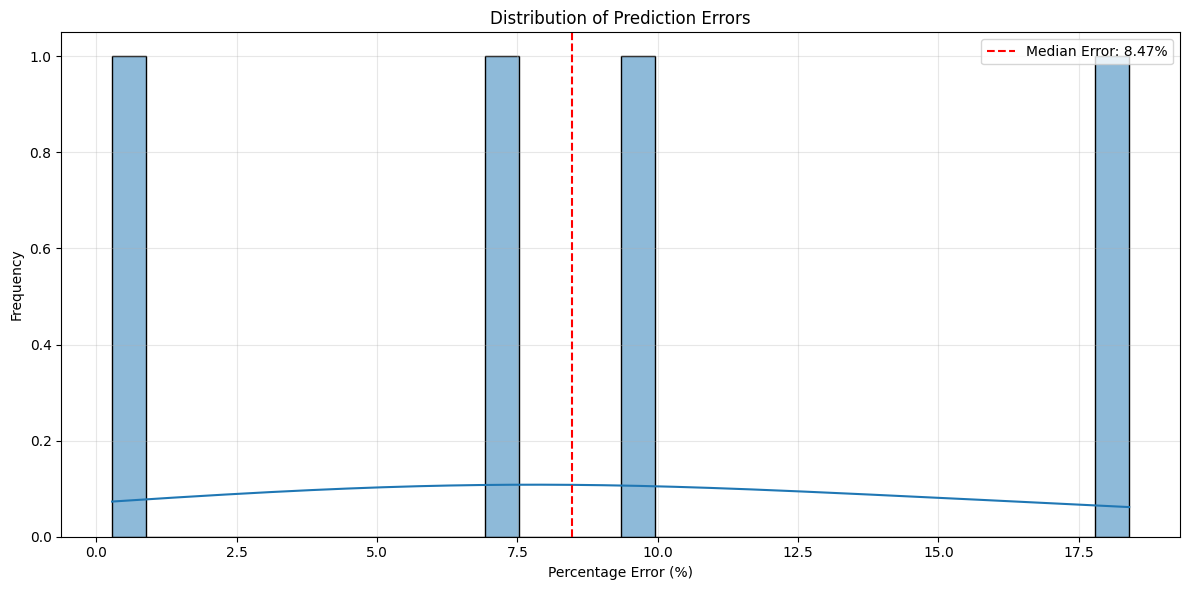

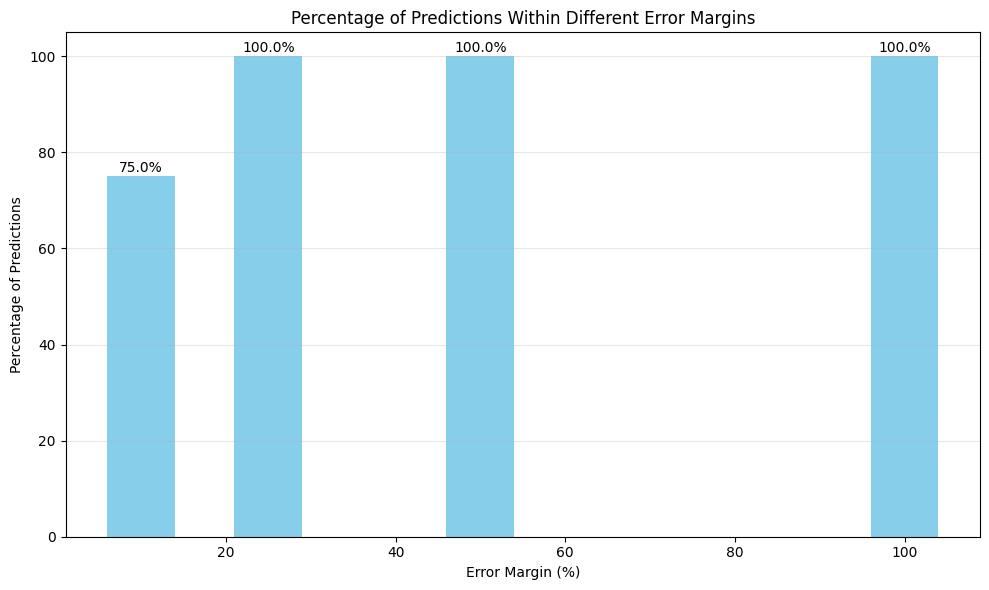

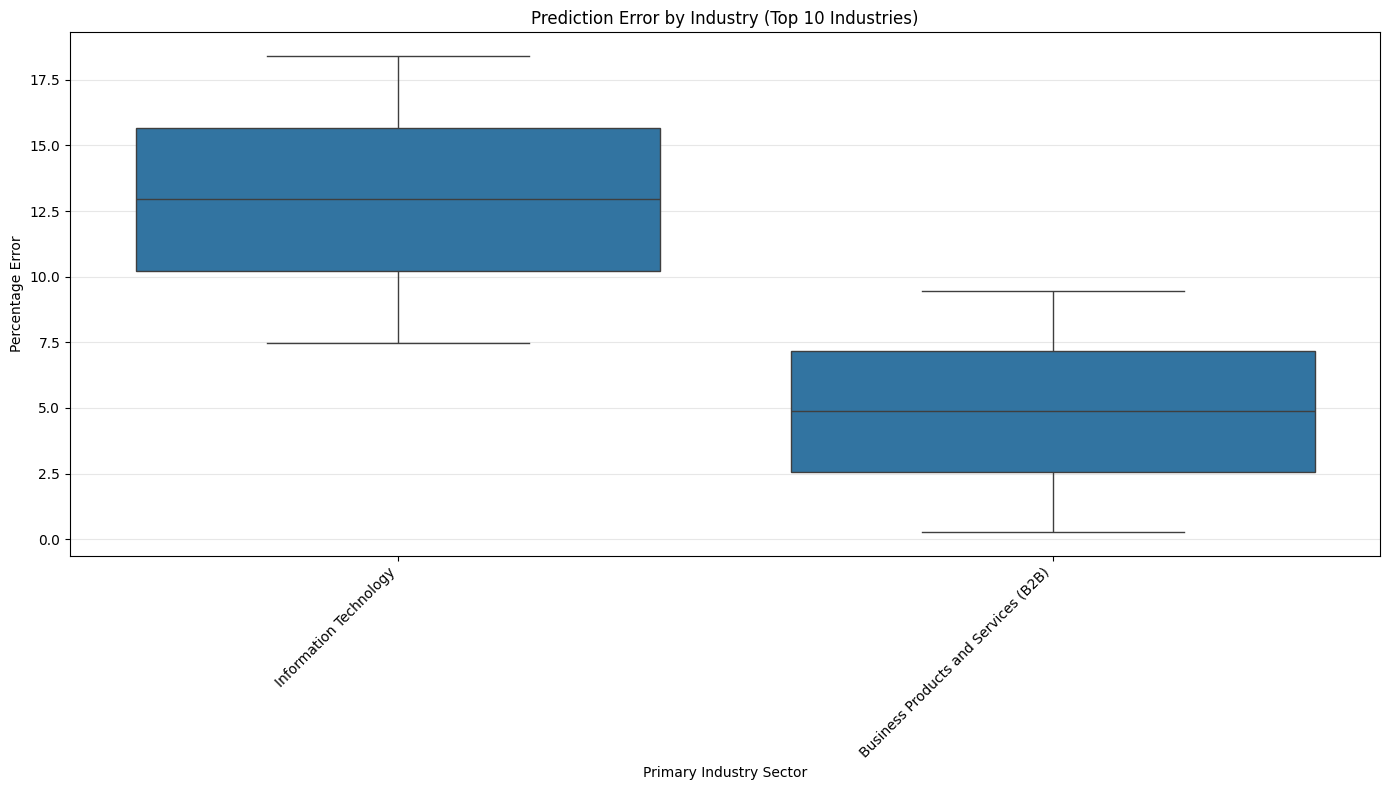


Worst Predictions (highest percentage error):
                      Company   Actual  Predicted  Percentage Error
1  Zilch (Financial Software) $1675.07   $1366.88            $18.40
3                      Zenjob  $382.67    $346.45             $9.46
0  Zilch (Financial Software)  $507.51    $469.54             $7.48
2                      Zenjob  $133.20    $133.57             $0.28

Best Predictions (lowest percentage error):
                      Company   Actual  Predicted  Percentage Error
2                      Zenjob  $133.20    $133.57             $0.28
0  Zilch (Financial Software)  $507.51    $469.54             $7.48
3                      Zenjob  $382.67    $346.45             $9.46
1  Zilch (Financial Software) $1675.07   $1366.88            $18.40

MAPE by Deal Type:
Deal Type
Early Stage VC   $7.48
Later Stage VC   $9.38
Name: Percentage Error, dtype: float64


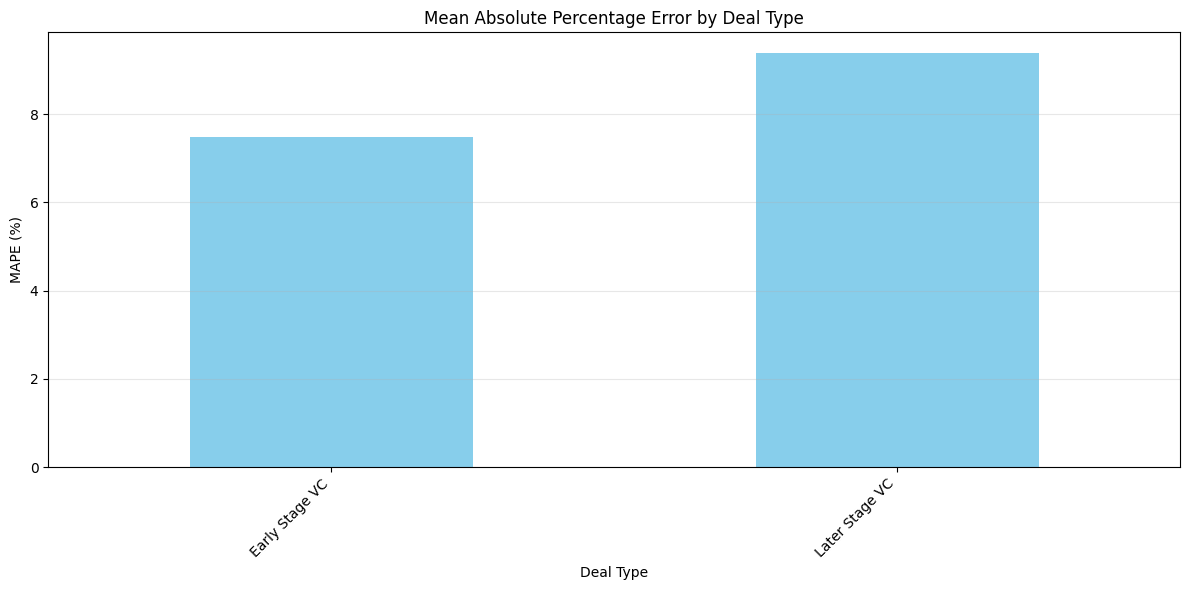

In [16]:
# Process CSV file, generate predictions, and evaluate error by company (row-by-row)
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Function to predict and evaluate companies (row-by-row, no merging)
def predict_and_evaluate_companies(csv_file='combined_test_with_urls.csv'):
    print(f"Processing {csv_file}...")
    
    # Load the data
    df = pd.read_csv(csv_file)
    print(f"Loaded {len(df)} rows from {csv_file}")
    
    # Load the model and feature info
    model_path = 'saved_model/valuation_prediction_model.pkl'
    features_path = 'saved_model/model_features.pkl'
    
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        print(f"Model loaded from {model_path}")
        
    with open(features_path, 'rb') as f:
        feature_info = pickle.load(f)
        print(f"Feature info loaded from {features_path}")
    
    # Extract relevant information
    target_variable = feature_info['target_variable']
    numerical_features = feature_info['numerical_features']
    categorical_features = feature_info['categorical_features']
    required_features = numerical_features + categorical_features
    
    print(f"\nModel expects {len(required_features)} features:")
    print(f"- {len(numerical_features)} numerical features")
    print(f"- {len(categorical_features)} categorical features")
    
    # Check if target variable exists for evaluation
    has_target = target_variable in df.columns and df[target_variable].notna().any()
    
    if not has_target:
        print(f"Error: Target variable '{target_variable}' not found or all values are NaN")
        return None
    
    # Filter to rows with target values
    eval_df = df[df[target_variable].notna()].copy()
    company_col = 'Companies' if 'Companies' in eval_df.columns else None
    
    if not company_col:
        print("Warning: 'Companies' column not found. Using row indices instead.")
        eval_df['Companies'] = [f"Company_{i+1}" for i in range(len(eval_df))]
        company_col = 'Companies'
    
    print(f"\nFound {len(eval_df)} rows with valid target values for evaluation")
    print(f"Number of unique companies: {eval_df[company_col].nunique()}")
    
    # Prepare feature data
    X = eval_df.copy()
    
    # Check for missing required features
    missing_features = [f for f in required_features if f not in X.columns]
    if missing_features:
        print(f"\nWarning: {len(missing_features)} required features are missing from input data:")
        print(', '.join(missing_features[:5]) + ('...' if len(missing_features) > 5 else ''))
        
        # Add missing features with NaN values
        for feature in missing_features:
            X[feature] = np.nan
    
    # Keep only required features
    X = X[required_features]
    
    # Check data types for debugging
    print("\nFeature data types:")
    print(X.dtypes.value_counts())
    
    # Get true values
    y_true = eval_df[target_variable].values
    
    # Predict using the model pipeline (which includes the feature engineering)
    print("\nGenerating predictions...")
    y_log_pred = model.predict(X)
    y_pred = np.expm1(y_log_pred)
    
    # Calculate overall metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Create results dataframe - process each row individually
    results_df = pd.DataFrame({
        'Company': eval_df[company_col],
        'Actual': y_true,
        'Predicted': y_pred,
        'Absolute Error': np.abs(y_true - y_pred),
        'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
    })
    
    # Add more context from original data if available
    for col in ['Deal Type', 'Primary Industry Sector', 'Deal Date', 'Deal Size', 'VC Round']:
        if col in eval_df.columns:
            results_df[col] = eval_df[col]
    
    # Print summary metrics
    print(f"\nOverall Metrics:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Sort by percentage error
    results_df_sorted = results_df.sort_values('Percentage Error')
    
    # Print predictions
    print("\nRow-by-row Predictions (sorted by error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results_df_sorted[['Company', 'Actual', 'Predicted', 'Percentage Error']].head(10))
    
    # Summary statistics
    print("\nError Distribution:")
    print(results_df['Percentage Error'].describe())
    
    # Count predictions within error margins
    error_margins = [10, 25, 50, 100]
    margin_counts = []
    for margin in error_margins:
        count = (results_df['Percentage Error'] <= margin).sum()
        percentage = (count / len(results_df)) * 100
        print(f"Predictions within {margin}% error: {count}/{len(results_df)} ({percentage:.1f}%)")
        margin_counts.append(percentage)
    
    # Reset display format
    pd.reset_option('display.float_format')
    
    # Save results to CSV
    results_df_sorted.to_csv("row_valuation_predictions.csv", index=False)
    print("\nSaved row-by-row predictions to row_valuation_predictions.csv")
    
    # Create visualizations
    # 1. Actual vs Predicted plot
    plt.figure(figsize=(10, 8))
    plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.6)
    
    # Add diagonal line for perfect predictions
    max_val = max(results_df['Actual'].max(), results_df['Predicted'].max())
    min_val = min(results_df['Actual'].min(), results_df['Predicted'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Actual Valuation ($)')
    plt.ylabel('Predicted Valuation ($)')
    plt.title('Actual vs Predicted Company Valuations')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('actual_vs_predicted.png')
    plt.show()
    
    # 2. Error distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(results_df['Percentage Error'].clip(0, 200), bins=30, kde=True)
    plt.axvline(results_df['Percentage Error'].median(), color='red', linestyle='--', 
               label=f'Median Error: {results_df["Percentage Error"].median():.2f}%')
    plt.xlabel('Percentage Error (%)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prediction Errors')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('error_distribution.png')
    plt.show()
    
    # 3. Error margin percentages
    plt.figure(figsize=(10, 6))
    plt.bar(error_margins, margin_counts, color='skyblue', width=8)
    plt.xlabel('Error Margin (%)')
    plt.ylabel('Percentage of Predictions')
    plt.title('Percentage of Predictions Within Different Error Margins')
    plt.grid(True, axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(margin_counts):
        plt.text(error_margins[i], v + 1, f'{v:.1f}%', ha='center')
        
    plt.tight_layout()
    plt.savefig('error_margins.png')
    plt.show()
    
    # 4. Error by Industry (if available)
    if 'Primary Industry Sector' in results_df.columns:
        plt.figure(figsize=(14, 8))
        
        # Get top industries by count
        top_industries = results_df['Primary Industry Sector'].value_counts().head(10).index
        industry_data = results_df[results_df['Primary Industry Sector'].isin(top_industries)]
        
        # Create boxplot
        sns.boxplot(x='Primary Industry Sector', y='Percentage Error', data=industry_data)
        plt.xticks(rotation=45, ha='right')
        plt.title('Prediction Error by Industry (Top 10 Industries)')
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig('error_by_industry.png')
        plt.show()
    
    return results_df_sorted

# Run the prediction and evaluation
results = predict_and_evaluate_companies()

# Display best and worst predictions
if results is not None:
    print("\nWorst Predictions (highest percentage error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results.sort_values('Percentage Error', ascending=False).head(5)[
        ['Company', 'Actual', 'Predicted', 'Percentage Error']])
    
    print("\nBest Predictions (lowest percentage error):")
    print(results.sort_values('Percentage Error').head(5)[
        ['Company', 'Actual', 'Predicted', 'Percentage Error']])
    
    # Analyze by deal type if available
    if 'Deal Type' in results.columns:
        print("\nMAPE by Deal Type:")
        deal_type_mape = results.groupby('Deal Type')['Percentage Error'].mean().sort_values()
        print(deal_type_mape)
        
        # Plot MAPE by deal type
        plt.figure(figsize=(12, 6))
        deal_type_mape.plot(kind='bar', color='skyblue')
        plt.title('Mean Absolute Percentage Error by Deal Type')
        plt.xlabel('Deal Type')
        plt.ylabel('MAPE (%)')
        plt.grid(True, axis='y', alpha=0.3)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('mape_by_deal_type.png')
        plt.show()
    
    pd.reset_option('display.float_format')

In [12]:
# Process CSV file, generate predictions, and evaluate error by company (row-by-row)
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to predict and evaluate companies (row-by-row, no merging)
def predict_and_evaluate_companies(csv_file='combined_test_with_urls.csv'):
    print(f"Processing {csv_file}...")
    
    # Load the data
    df = pd.read_csv(csv_file)
    
    # Load the model and feature info
    model_path = 'saved_model/valuation_prediction_model.pkl'
    features_path = 'saved_model/model_features.pkl'
    
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        
    with open(features_path, 'rb') as f:
        feature_info = pickle.load(f)
    
    # Extract relevant information
    target_variable = feature_info['target_variable']
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    
    # Check if target variable exists for evaluation
    has_target = target_variable in df.columns and df[target_variable].notna().any()
    
    if not has_target:
        print(f"Error: Target variable '{target_variable}' not found or all values are NaN")
        return None
    
    # Filter to rows with target values
    eval_df = df[df[target_variable].notna()].copy()
    company_col = 'Companies' if 'Companies' in eval_df.columns else None
    
    if not company_col:
        print("Warning: 'Companies' column not found. Using row indices instead.")
        eval_df['Companies'] = [f"Company_{i+1}" for i in range(len(eval_df))]
        company_col = 'Companies'
    
    print(f"Found {len(eval_df)} rows with target values for evaluation")
    print(f"Number of unique companies: {eval_df[company_col].nunique()}")
    
    # Prepare feature data
    X = eval_df.copy()
    
    # Handle missing required features
    missing_features = [f for f in required_features if f not in X.columns]
    for feature in missing_features:
        X[feature] = np.nan
    
    # Keep only required features
    X = X[required_features]
    
    # Get true values
    y_true = eval_df[target_variable].values
    
    # Predict
    y_log_pred = model.predict(X)
    y_pred = np.expm1(y_log_pred)
    
    # Calculate overall metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Create results dataframe - process each row individually (no groupby)
    results_df = pd.DataFrame({
        'Company': eval_df[company_col],
        'Actual': y_true,
        'Predicted': y_pred,
        'Absolute Error': np.abs(y_true - y_pred),
        'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
    })
    
    # Add more context from original data if available
    if 'Deal Type' in eval_df.columns:
        results_df['Deal Type'] = eval_df['Deal Type']
    
    if 'Primary Industry Sector' in eval_df.columns:
        results_df['Industry'] = eval_df['Primary Industry Sector']
    
    if 'Deal Date' in eval_df.columns:
        results_df['Deal Date'] = eval_df['Deal Date']
    
    if 'Deal Size' in eval_df.columns:
        results_df['Deal Size'] = eval_df['Deal Size']
    
    # Print summary metrics
    print(f"\nOverall Metrics:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Sort by percentage error
    results_df_sorted = results_df.sort_values('Percentage Error')
    
    # Print predictions
    print("\nRow-by-row Predictions (sorted by error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results_df_sorted.head(10))
    
    # Summary statistics
    print("\nError Distribution:")
    print(results_df['Percentage Error'].describe())
    
    # Count predictions within error margins
    error_margins = [10, 25, 50, 100]
    for margin in error_margins:
        count = (results_df['Percentage Error'] <= margin).sum()
        percentage = (count / len(results_df)) * 100
        print(f"Predictions within {margin}% error: {count}/{len(results_df)} ({percentage:.1f}%)")
    
    # Reset display format
    pd.reset_option('display.float_format')
    
    # Save results to CSV
    results_df_sorted.to_csv("row_valuation_predictions.csv", index=False)
    print("\nSaved row-by-row predictions to row_valuation_predictions.csv")
    
    return results_df_sorted

# Run the prediction and evaluation
results = predict_and_evaluate_companies()

# Display worst predictions (highest error)
if results is not None:
    print("\nWorst Predictions (highest percentage error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results.sort_values('Percentage Error', ascending=False).head(5))
    
    # Display best predictions (lowest error)
    print("\nBest Predictions (lowest percentage error):")
    print(results.sort_values('Percentage Error').head(5))
    
    # Count predictions by company
    company_counts = results['Company'].value_counts()
    print("\nNumber of predictions per company:")
    print(company_counts.head(10))
    
    pd.reset_option('display.float_format')

Processing combined_test_with_urls.csv...
Found 4 rows with target values for evaluation
Number of unique companies: 2

Overall Metrics:
MAE: $146.14
RMSE: $256.79
MAPE: 12.57%

Row-by-row Predictions (sorted by error):
                      Company   Actual  Predicted  Absolute Error  \
2                      Zenjob  $133.20    $137.51           $4.31   
0  Zilch (Financial Software)  $507.51    $483.18          $24.33   
3                      Zenjob  $382.67    $427.56          $44.89   
1  Zilch (Financial Software) $1675.07   $1164.05         $511.02   

   Percentage Error       Deal Type                              Industry  \
2             $3.24  Later Stage VC  Business Products and Services (B2B)   
0             $4.79  Early Stage VC                Information Technology   
3            $11.73  Later Stage VC  Business Products and Services (B2B)   
1            $30.51  Later Stage VC                Information Technology   

    Deal Date  Deal Size  
2  2020-05-12     $27

In [6]:
company_results

NameError: name 'company_results' is not defined

In [ ]:
# Create a reusable prediction function
def predict_valuation(new_data, model_path='saved_model/valuation_prediction_model.pkl', 
                     features_path='saved_model/model_features.pkl'):
    """
    Predict company valuation using the trained model.
    
    Parameters:
    -----------
    new_data : pandas DataFrame
        Data containing features for prediction
    model_path : str
        Path to the saved model file
    features_path : str
        Path to the saved feature information
        
    Returns:
    --------
    numpy.ndarray
        Predicted valuation(s)
    """
    # Load the model and feature information
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        
    with open(features_path, 'rb') as f:
        feature_info = pickle.load(f)
    
    # Ensure all required features are present
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    missing_features = [f for f in required_features if f not in new_data.columns]
    
    # Create a copy to avoid modifying the original dataframe
    data = new_data.copy()
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with NaN values
        for feature in missing_features:
            data[feature] = np.nan
    
    # Keep only required features
    data = data[required_features]
    
    # Make prediction (log-transformed)
    y_pred_log = model.predict(data)
    
    # Transform back to original scale
    y_pred = np.expm1(y_pred_log)
    
    return y_pred

# Example of how to use the function:
# sample_company = pd.DataFrame({
#     'Deal Size': [5000000],
#     'Pre-money Valuation': [20000000],
#     'Primary Industry Sector': ['Software'],
#     'Deal Type': ['Series A']
# })
# predicted_val = predict_valuation(sample_company)
# print(f"Predicted valuation: ${predicted_val[0]:,.2f}")

print("Prediction function created. You can now use predict_valuation() to make predictions on new data.")

Loading and preparing dataset...
Dataset shape: (295, 175)
Number of unique companies: 110
Target variable: Post Valuation

1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 295 (out of 295 total rows)

Numerical features: 13
Categorical features: 7

2. Creating train-test split with IPOs in test set and latest non-IPO rounds in training set...
IPO deals found: 81 out of 295 total records
Non-IPO deals found: 214 out of 295 total records
Found 107 unique companies with non-IPO deals
Training set (latest non-IPO rounds): 107 samples
Test set (all IPO rounds): 81 samples


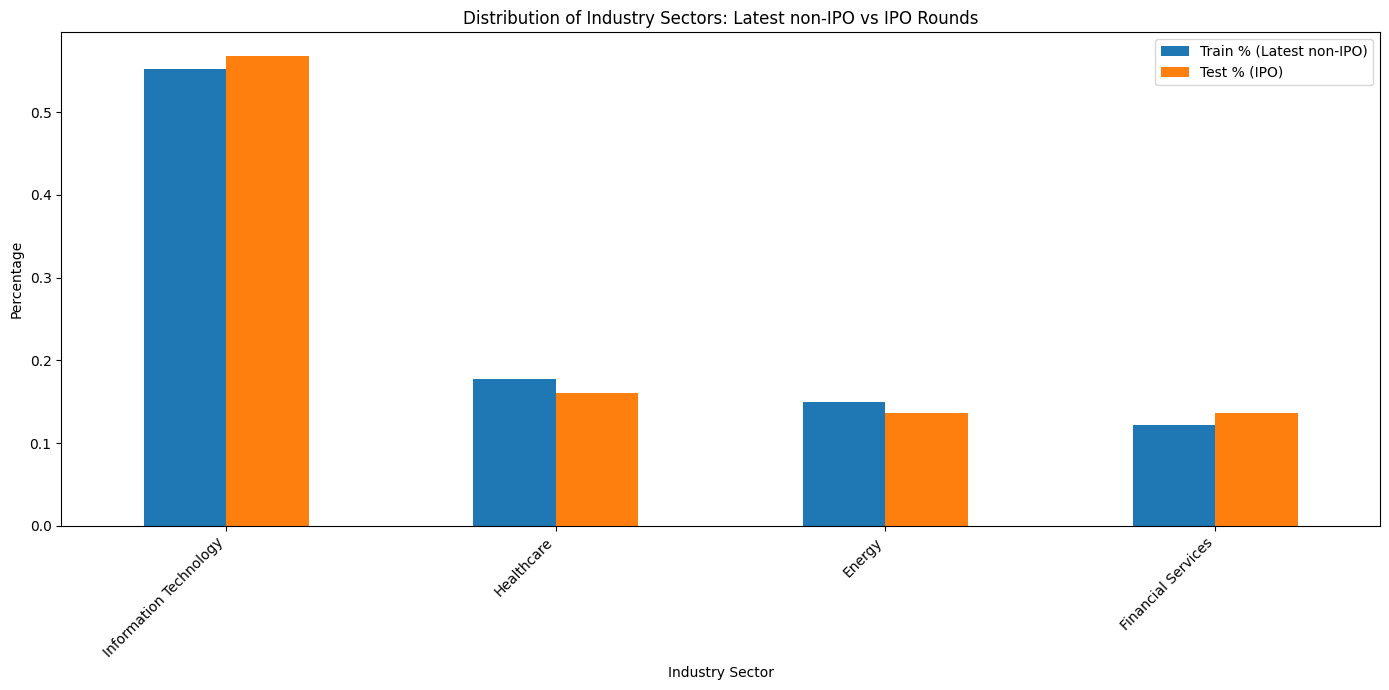


Deal Type distribution in training set:
Deal Type
Later Stage VC                         25
PIPE                                   23
Early Stage VC                         12
Reverse Merger                         12
Secondary Transaction - Private        10
Public Investment 2nd Offering          6
Equity Crowdfunding                     4
Angel (individual)                      3
PE Growth/Expansion                     3
Secondary Transaction - Open Market     2
Seed Round                              2
Corporate                               2
Merger/Acquisition                      1
Share Repurchase                        1
Buyout/LBO                              1
Name: count, dtype: int64

Deal Type distribution in test set:
Deal Type
IPO    81
Name: count, dtype: int64

Analyzing VC Round distribution in train and test sets...

VC Round distribution:
           Train % (Latest non-IPO)  Test % (IPO)
VC Round                                         
3rd Round                  

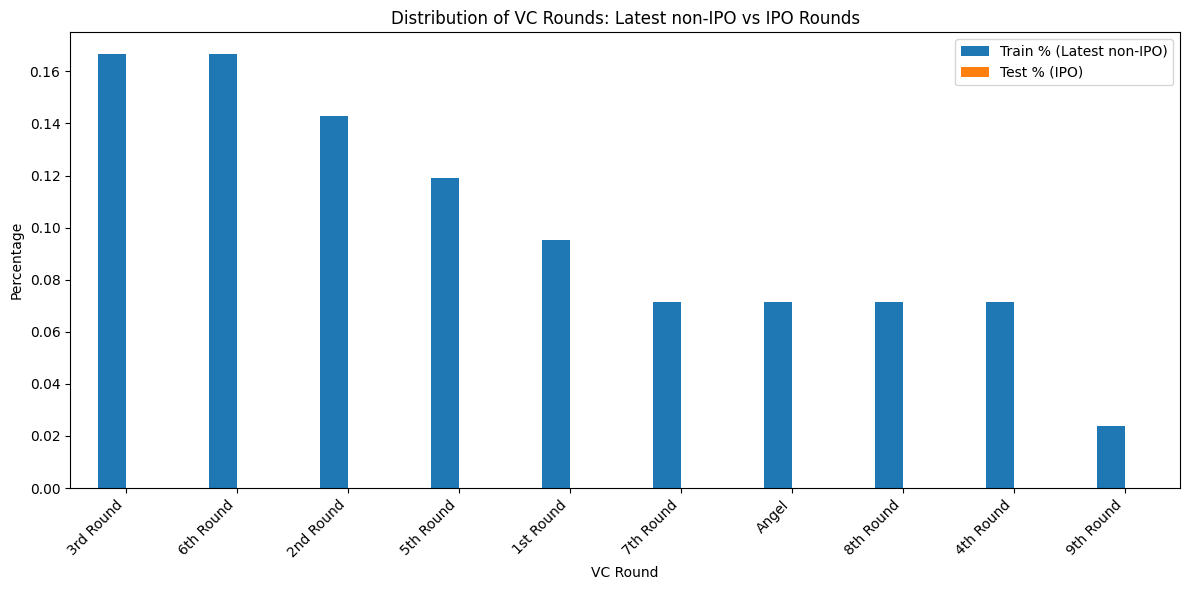


3. Ready for feature preprocessing and model training with this train-test split
Preprocessing pipelines can now be set up and models can be trained using X_train, y_train
Models will be evaluated on X_test, y_test (IPO data)


In [ ]:
# Complete implementation: IPOs to Test Set, Latest non-IPO Round to Train Set

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
print("Loading and preparing dataset...")
df = pd.read_csv('combined_ipo_with_urls.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of unique companies: {df['Companies'].nunique()}")

# Define the target variable
target_variable = 'Post Valuation'
print(f"Target variable: {target_variable}")

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom transformer for handling missing values in categorical features
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value='missing'):
        self.fill_value = fill_value
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).fillna(self.fill_value)

# Definition for InteractionFeatureTransformer if needed
class InteractionFeatureTransformer(BaseEstimator, TransformerMixin):
    """Generate interaction terms between numerical features"""
    def __init__(self, interaction_only=True, include_bias=False):
        self.interaction_only = interaction_only
        self.include_bias = include_bias
        from sklearn.preprocessing import PolynomialFeatures
        self.poly = PolynomialFeatures(
            degree=2,  # Just pairwise interactions
            interaction_only=self.interaction_only,
            include_bias=self.include_bias
        )
        self.feature_names_out = None
        
    def fit(self, X, y=None):
        # Convert to numpy array if it's a DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        
        # Fit polynomial features
        self.poly.fit(X_array)
        
        # Store feature names for later use
        if hasattr(X, 'columns'):
            # If X is a DataFrame, get column names
            original_features = X.columns.tolist()
        else:
            # If X is a numpy array, generate feature names
            original_features = [f'x{i}' for i in range(X_array.shape[1])]
            
        self.feature_names_out = self.poly.get_feature_names_out(original_features)
        
        return self
    
    def transform(self, X):
        # Convert to numpy array if it's a DataFrame
        X_array = X.values if hasattr(X, 'values') else X
        
        # Transform data to include interaction terms
        X_poly = self.poly.transform(X_array)
        
        # Return as DataFrame with proper column names
        if hasattr(X, 'index'):
            return pd.DataFrame(X_poly, columns=self.feature_names_out, index=X.index)
        else:
            return pd.DataFrame(X_poly, columns=self.feature_names_out)
    
    def get_feature_names_out(self, input_features=None):
        return self.feature_names_out

# 1. Data Preparation
print("\n1. Preparing data for machine learning...")

# Identify features for modeling based on domain knowledge
financial_features = [
    'Deal Size', 'Pre-money Valuation',
    'Revenue', 'EBITDA', 'Net Income', 'Gross Profit',
    'Employees', '# Investors', '# New Investors', '# Follow-on Investors',
    'Raised to Date', 'Total Invested Equity'
]

company_features = [
    'Primary Industry Sector', 'Primary Industry Group', 
    'Current Business Status', 'Current Financing Status',
    'Year Founded'
]

deal_features = [
    'Deal Type', 'VC Round', 'Financing Status'
]

# Combine all potential features
potential_features = financial_features + company_features + deal_features

# Filter to only include columns that actually exist in our dataset
selected_features = [col for col in potential_features if col in df.columns]
print(f"Selected {len(selected_features)} features for modeling:")
print(selected_features)

# Remove rows where target variable is missing
valid_data = df.dropna(subset=[target_variable]).reset_index(drop=True)
print(f"\nRows with valid target: {len(valid_data)} (out of {len(df)} total rows)")

# Separate features into numerical and categorical
numerical_features = []
categorical_features = []

for feature in selected_features:
    if feature == target_variable:
        continue
    
    if valid_data[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# 2. Create train/test split with IPOs in test set and latest non-IPO rounds in train set
print("\n2. Creating train-test split with IPOs in test set and latest non-IPO rounds in training set...")

# Check if necessary columns exist
if 'Deal Type' in valid_data.columns and 'Companies' in valid_data.columns:
    # Create feature matrix and target vector
    X = valid_data[selected_features].copy()
    X = X.drop(columns=[target_variable], errors='ignore')
    y = valid_data[target_variable]
    
    # Apply log transformation to the target variable to handle skewness
    y_log = np.log1p(y)
    
    # Split data into IPO and non-IPO deals
    ipo_mask = valid_data['Deal Type'] == "IPO"
    ipo_data = valid_data[ipo_mask].copy()
    non_ipo_data = valid_data[~ipo_mask].copy()
    
    print(f"IPO deals found: {len(ipo_data)} out of {len(valid_data)} total records")
    print(f"Non-IPO deals found: {len(non_ipo_data)} out of {len(valid_data)} total records")
    
    # Initialize train indices list
    train_indices = []
    
    # Get a list of all unique companies
    companies = non_ipo_data['Companies'].unique()
    print(f"Found {len(companies)} unique companies with non-IPO deals")
    
    # For each company in the non-IPO dataset, get the latest funding round
    for company in companies:
        company_data = non_ipo_data[non_ipo_data['Companies'] == company].copy()
        
        # Try to sort by date if available
        if 'Deal Date' in company_data.columns and pd.notna(company_data['Deal Date']).any():
            # Convert to datetime if not already
            if company_data['Deal Date'].dtype != 'datetime64[ns]':
                try:
                    company_data['Deal Date'] = pd.to_datetime(company_data['Deal Date'], errors='coerce')
                except:
                    # If conversion fails, use the first available row
                    train_indices.append(company_data.index[0])
                    continue
            
            # Sort by date (most recent first) and take the first row
            latest_data = company_data.sort_values('Deal Date', ascending=False).iloc[0:1]
            train_indices.extend(latest_data.index)
        else:
            # If no date information, just take the first row
            train_indices.append(company_data.index[0])
    
    # All IPO data goes to test set
    test_indices = ipo_data.index.tolist()
    
    # Create train and test sets
    X_train = X.loc[train_indices]
    y_train = y_log.loc[train_indices]
    X_test = X.loc[test_indices]
    y_test = y_log.loc[test_indices]
    
    print(f"Training set (latest non-IPO rounds): {len(X_train)} samples")
    print(f"Test set (all IPO rounds): {len(X_test)} samples")
    
    # Analyze the distribution of industries in both sets
    if 'Primary Industry Sector' in valid_data.columns:
        print("\nAnalyzing industry distribution in train and test sets...")
        train_sectors = valid_data.loc[train_indices, 'Primary Industry Sector'].value_counts(normalize=True)
        test_sectors = valid_data.loc[test_indices, 'Primary Industry Sector'].value_counts(normalize=True)
        
        # Get top sectors across both sets
        top_sectors = pd.concat([train_sectors, test_sectors]).index.unique()[:10]
        
        # Filter for top sectors only
        train_dist = pd.DataFrame(train_sectors[train_sectors.index.isin(top_sectors)])
        test_dist = pd.DataFrame(test_sectors[test_sectors.index.isin(top_sectors)])
        
        # Combine into comparison dataframe
        dist_compare = pd.concat([train_dist, test_dist], axis=1)
        dist_compare.columns = ['Train % (Latest non-IPO)', 'Test % (IPO)']
        dist_compare = dist_compare.fillna(0)  # Fill NaN values with 0
        
        # Display the comparison
        print("\nIndustry Sector distribution (top 10 sectors):")
        print(dist_compare.head(10))
        
        # Visualize industry distribution
        plt.figure(figsize=(14, 7))
        dist_compare.plot(kind='bar', ax=plt.gca())
        plt.title('Distribution of Industry Sectors: Latest non-IPO vs IPO Rounds')
        plt.ylabel('Percentage')
        plt.xlabel('Industry Sector')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Analyze distribution of deal types for verification
    print("\nDeal Type distribution in training set:")
    print(valid_data.loc[train_indices, 'Deal Type'].value_counts())
    print("\nDeal Type distribution in test set:")
    print(valid_data.loc[test_indices, 'Deal Type'].value_counts())
    
    # Analyze the distribution of VC rounds if available
    if 'VC Round' in valid_data.columns:
        print("\nAnalyzing VC Round distribution in train and test sets...")
        train_rounds = valid_data.loc[train_indices, 'VC Round'].value_counts(normalize=True)
        test_rounds = valid_data.loc[test_indices, 'VC Round'].value_counts(normalize=True)
        
        # Create dataframe for comparison
        train_dist = pd.DataFrame(train_rounds)
        test_dist = pd.DataFrame(test_rounds)
        
        # Combine into comparison dataframe
        round_compare = pd.concat([train_dist, test_dist], axis=1)
        round_compare.columns = ['Train % (Latest non-IPO)', 'Test % (IPO)']
        round_compare = round_compare.fillna(0)  # Fill NaN values with 0
        
        # Display the comparison
        print("\nVC Round distribution:")
        print(round_compare.head(10))
        
        # Visualize VC round distribution
        plt.figure(figsize=(12, 6))
        round_compare.plot(kind='bar', ax=plt.gca())
        plt.title('Distribution of VC Rounds: Latest non-IPO vs IPO Rounds')
        plt.ylabel('Percentage')
        plt.xlabel('VC Round')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
    # 3. Feature preprocessing and model training
    print("\n3. Setting up feature preprocessing and model training pipelines...")
    
    # Define preprocessing steps for numerical and categorical features
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('interactions', InteractionFeatureTransformer(interaction_only=True, include_bias=False)),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', CategoricalImputer(fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    # Dictionary of models to evaluate
    models = {
        'XGBoost': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
        'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Extra Trees': ExtraTreesRegressor(random_state=42),
        'Ridge': Ridge(alpha=1.0, random_state=42)
    }
    
    # Create results DataFrame to store model performance
    results_df = pd.DataFrame(columns=['MAE', 'RMSE', 'R² Score', 'MAPE (%)'])
    
    print("Training and evaluating models...")
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        
        # Fit the pipeline on the training data
        pipeline.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred_log = pipeline.predict(X_test)
        
        # Transform predictions back to original scale
        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y_test)
        
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        
        # Store results
        results_df.loc[name] = [mae, rmse, r2, mape]
        
        print(f"{name} Results:")
        print(f"  MAE: ${mae:,.2f}")
        print(f"  RMSE: ${rmse:,.2f}")
        print(f"  R² Score: {r2:.4f}")
        print(f"  MAPE: {mape:.2f}%")
    
    # Sort models by MAPE (lower is better)
    results_df = results_df.sort_values('MAPE (%)')
    
    # Get the best model
    best_model_name = results_df.index[0]
    best_model_mape = results_df.loc[best_model_name, 'MAPE (%)'] 
    
    print(f"\nBest model: {best_model_name} with MAPE: {best_model_mape:.2f}%")
    
    # Retrain the best model on the entire dataset
    print(f"\nRetraining {best_model_name} on all training data for final model...")
    
    best_model = models[best_model_name]
    final_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    final_pipeline.fit(X_train, y_train)
    
    # Evaluate the final model on the test set (IPO data)
    print("\nEvaluating final model on IPO test data...")
    y_pred_log = final_pipeline.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    
    # Calculate final evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    print(f"Final Model Performance on IPO Data:")
    print(f"  MAE: ${mae:,.2f}")
    print(f"  RMSE: ${rmse:,.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAPE: {mape:.2f}%")
    
    # Create a scatter plot of actual vs. predicted values for visualization
    plt.figure(figsize=(12, 8))
    
    # Add a perfect prediction line
    max_val = max(max(y_true), max(y_pred))
    plt.plot([0, max_val], [0, max_val], 'r--', label='Perfect Prediction')
    
    # Plot the actual predictions
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.title(f'Actual vs. Predicted IPO Valuations - {best_model_name} Model')
    plt.xlabel('Actual Valuation ($)')
    plt.ylabel('Predicted Valuation ($)')
    
    # Use log scale for better visualization
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Save the final model and feature information
    model_dir = "saved_ipo_model"
    os.makedirs(model_dir, exist_ok=True)
    
    model_filename = os.path.join(model_dir, "valuation_prediction_model.pkl")
    feature_filename = os.path.join(model_dir, "model_features.pkl")
    
    # Save the trained model
    with open(model_filename, 'wb') as f:
        pickle.dump(final_pipeline, f)
        
    # Save feature information for future use
    feature_info = {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'target_variable': target_variable
    }
    
    with open(feature_filename, 'wb') as f:
        pickle.dump(feature_info, f)
    
    print(f"\nModel saved to {model_filename}")
    print(f"Feature information saved to {feature_filename}")
    
    # Create a prediction function that can be used for new companies
    print("\nCreating prediction function for new data...")
    
    def predict_valuation(new_data):
        """Predict Post Valuation for new company data.
        
        Parameters:
        -----------
        new_data : pandas DataFrame
            DataFrame containing company data. Should have relevant features.
        
        Returns:
        --------
        numpy array
            Predicted valuation(s) in the original scale (not log-transformed)
        """
        # Load the model and feature info
        with open(model_filename, 'rb') as f:
            model = pickle.load(f)
        
        with open(feature_filename, 'rb') as f:
            feature_info = pickle.load(f)
        
        # Ensure all required features are present
        required_features = feature_info['numerical_features'] + feature_info['categorical_features']
        missing_features = [f for f in required_features if f not in new_data.columns]
        
        # Create a copy to avoid modifying the original dataframe
        data = new_data.copy()
        
        if missing_features:
            print(f"Warning: Missing features: {missing_features}")
            # Add missing features with NaN values
            for feature in missing_features:
                data[feature] = np.nan
        
        # Keep only required features
        data = data[required_features]
        
        # Make prediction (log-transformed)
        y_pred_log = model.predict(data)
        
        # Transform back to original scale
        y_pred = np.expm1(y_pred_log)
        
        return y_pred
    
    print("Complete implementation finished. The model has been trained on the latest non-IPO rounds")
    print("and evaluated on IPO rounds. A prediction function 'predict_valuation()' is now available.")
    print(f"The best model was {best_model_name} with a MAPE of {best_model_mape:.2f}%")
    
    # Optional: Example usage of the prediction function
    print("\nExample prediction:")
    sample_company = X_test.iloc[[0]].copy()
    predicted_val = predict_valuation(sample_company)
    actual_val = np.expm1(y_test.iloc[0])
    print(f"Predicted valuation: ${predicted_val[0]:,.2f}")
    print(f"Actual valuation: ${actual_val:,.2f}")
    print(f"Error: {abs(predicted_val[0] - actual_val) / actual_val * 100:.2f}%")

else:
    missing_cols = []
    if 'Deal Type' not in valid_data.columns:
        missing_cols.append('Deal Type')
    if 'Companies' not in valid_data.columns:
        missing_cols.append('Companies')
    print(f"Warning: {', '.join(missing_cols)} column(s) not found. Cannot create the train-test split.")